## 项目来源
这是在Github 上找到的一个美国数据科学家在申请工作时的"作业"，[英文作业链接](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/hw_assignment.pdf)。

## 项目目标
- **使用提供的建筑能源数据开发一个模型，该模型可以预测建筑物的能源之星分数（building's Energy Star score）；**
- **解释结果以找到最能预测分数的变量。**

这是一个**有监督**的**回归**机器学习任务：给定一组包含目标（在本项目中为`ENERGY STAR Score`能源之星分数）的数据，我们希望训练一个可以学习将特征（也称为解释变量）映射到目标的模型。
- 监督学习：数据集中同时存在特征和目标变量；
- 回归任务：目标变量时连续值，在本项目中为0~100。

在训练过程中，我们希望模型学习特征和分数之间的关系；然后，为了测试模型的学习效果，我们在一个没有分数的测试集上进行评估！

## 机器学习工作流程
虽然每一个机器学习任务的实现细节可能会有所不同，但一般有以下[几个步骤](https://towardsdatascience.com/the-7-steps-of-machine-learning-2877d7e5548e?gi=30cd995093a9)：

1. 数据清理和格式化
2. 探索性数据分析
3. 特征工程和选择
4. 建立baseline并根据性能指标比较多个机器学习模型
5. 对最佳模型执行超参数调整，以针对该问题进行优化
6. 使用最佳模型评估测试集
7. 尽可能地解释模型结果
8. 得出结论并撰写详尽记录的报告

提前设置步骤让我们可以看到一步流入另一步。但是，机器学习过程是一个迭代过程，因此我们并不总是以线性方式遵循这些步骤。我们可能会根据下一步的结果重新审视上一步。例如：

- 虽然我们可以在构建任何模型之前执行特征选择，但我们可以使用建模结果返回并选择一组不同的特征；
- 或者，建模可能会出现意想不到的结果，这意味着我们希望从另一个角度探索我们的数据；
- 一般来说，你必须先完成一步才能继续下一步，但不要觉得一旦你第一次完成一步，你就不能回头做出改进，你可以在任何时候返回前面的步骤做响应的修改。

## 0 导入库文件
使用标准的数据科学和机器学习库:numpy、panda和scikit-learn，同时使用matplotlib和seaborn进行可视化。

In [62]:
# 用于数值计算的 Pandas和numpy
import pandas as pd
import numpy as np

# 不显示在切片副本上的警告
pd.options.mode.chained_assignment = None

# Matplotlib可视化
import matplotlib.pyplot as plt
%matplotlib inline

# 设置默认字体
plt.rcParams['font.size'] = 24

# 用于设置图形大小的内部ipython工具
from IPython.core.pylabtools import figsize

# Seaborn可视化
import seaborn as sns
# 缩放因子
sns.set(font_scale = 2)

# 将数据划分为训练集和测试集
from sklearn.model_selection import train_test_split

## 1 数据清理和格式化
### 1.1 导入并检查数据
将数据加载到pandas数据帧中，这是数据科学最有用的数据结构之一。 将其视为Python中的电子表格，我们可以轻松地操作，清理和可视化。[Pandas官方文档](http://pandas.pydata.org/pandas-docs/stable/)。

In [64]:
# 读取数据
data = pd.read_csv('dataset/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
# 显示数据大小
print('datashape:',data.shape)
# 显示表头
data.head()

datashape: (11746, 60)


Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  \
0  201/205  East  42nd  st.            Not Available   
1          622 168th Street            Not Available   
2             3975 Broadway            Not Available   
3   161 Fort Washington Ave  177 Fort Washington Ave   
4     710 West 168th Street            Not Available   

                         ...                         Source EUI (kBtu/ft²)  \
0                        ...                                         619.4   
1                        ...                                         404.3   
2                        ...                                 Not Available   
3                        ...                                 Not Available   
4                        ...                                 Not Available   

             Release Date Water Required? DOF Benchmarking Submission Status  \
0  05/01/2017 05:32:03 PM              No                      In Compliance   
1  04/27/2017 11:23:27 AM              No                      In Compliance   
2  04/27/2017 11:23:27 AM              No                      In Compliance   
3  04/27/2017 11:23:27 AM              No                      In Compliance   
4  04/27/2017 11:23:27 AM              No                      In Compliance   

    Latitude  Longitude Community Board Council District Census Tract  \
0  40.750791 -73.973963             6.0              4.0         88.0   
1  40.841402 -73.942568            12.0             10.0        251.0   
2  40.840427 -73.940249            12.0             10.0        251.0   
3  40.840746 -73.942854            12.0             10.0        255.0   
4  40.841559 -73.942528            12.0             10.0        255.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  
2  Washington Heights South                      ...  
3  Washington Heights South                      ...  
4  Washington Heights South                      ...  

[5 rows x 60 columns]

原始数据中有看一下原始数据11746行，60列，我们的目标是预测`ENERGY STAR Score`列中的数字，其他列作为特征。

根据数据集的文件名为`Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv`,这里面有一个Local_Law_84，根据Local_Law_84进行搜索，得到两个比较关键的资料：

[Local_Law_84网站](http://www.nyc.gov/html/gbee/html/plan/ll84.shtml)

[基准化公开数据定义](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf) 

第一个网站告诉我们，当地Local_Law_84是纽约市的一项要求，规定所有超过50,000𝑓𝑡2的建筑物必须每年报告一组与能源相关的数字。pdf文档说明每列代表的含义，虽然我们不需要研究每一列，但至少要理解我们想要预测的目标是个好主意。以下是`ENERGY STAR Score`能源之星分数的定义：

- 基于报告年度自我报告的能源使用情况，在投资组合管理器中计算的指定建筑类型的的分数：范围在1到100。

这看起来非常简单：能源之星分数是一种根据能源效率对建筑物进行排名的方法，其中最差的是1，最好是100。它是相对百分位排名，这意味着建筑物相对于彼此进行评分，并且应该在整个值范围内显示均匀分布。

### 1.2 数据类型和缺失值处理
dataframe.info方法是一种通过显示每列的数据类型和非缺失值的数量来评估数据的快速方法。 从查看数据帧开始，可能会出现问题，因为缺失值被编码为“Not Available”而不是`np.nan`（不是数字）（因为csv文件某些列同时包含数字和字符两种类型）。 这意味着具有数字的列将不会表示为数字，**因为pandas会将具有字符串值的列转换为字符串的列。**

In [66]:
# 查看数据列的数据类型和非缺失值数量
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

果然，有许多列的数字已被标记为对象数据类型（`object`）。 在我们进行数值分析之前，必须将它们转换为float数据类型。

### 1.3 将数据转换为正确的数据类型
将带有数字的列转换为数字数据类型，方法是将“Not Available”条目替换为可以解释为浮点数的`np.nan`。 然后我们将包含数值（例如$ft^2$或$kWh$）的列转换为数值数据类型。

In [68]:
# 用np.nan替换所有的Not Available”
data = data.replace({'Not Available': np.nan})

# 将应该为数值类型的列转换为数值类型
for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [70]:
# 每一列的统计信息
data.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

           ...        Indirect GHG Emissions (Metric Tons CO2e)  \
count      ...                                     1.168100e+04   
mean       ...                                     2.076339e+03   
std        ...                                     5.931295e+04   
min        ...                                    -2.313430e+04   
25%        ...                                     9.480000e+01   
50%        ...                                     1.718000e+02   
75%        ...                                     4.249000e+02   
max        ...                                     4.764375e+06   

       Property GFA - Self-Reported (ft²)  \
count                        1.174600e+04   
mean                         1.673739e+05   
std                          3.189238e+05   
min                          0.000000e+00   
25%                          6.699400e+04   
50%                          9.408000e+04   
75%                          1.584140e+05   
max

### 1.4 缺失值处理
现在我们有了正确的列数据类型，我们可以通过查看每列中缺失值的百分比来开始分析。 当我们进行探索性数据分析时，需要计算缺失值的数量以及每列缺少的总值的百分比。处理方式参考[Stack Overflow forum](https://stackoverflow.com/a/39734251)的函数。

In [72]:
# 计算每一列中缺失值占比
def missing_values_table(df):
        # 计算总的缺失值         
        mis_val = df.isnull().sum()
        
        # 计算缺失值的百分比
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # 保存缺失值信息的表格         
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # 列重命名         
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # 缺失值比例按列降序         
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # 打印总结信息         
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # 返回各列缺失值占比信息         
        return mis_val_table_ren_columns

# 调用函数
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

根据前面的data.shape可知数据集里一共有11746个实例。我们可以看到我们的目标`ENERGY STAR Score`能源之星分数有2104个缺失值，占比17.9%，非缺失值有9642个。

虽然我们尽量不能丢失信息，但如果列的丢失值占比很高，那么它可能对结果预测没什么帮助。要保留哪些列在[这里](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456)有一些讨论，本项目中，我们将删除缺失值超过50％的列。一般来说，要特别小心丢弃任何特征，因为即使有一些缺失值，该特征仍然有可能对于预测目标值有帮助。

In [74]:
# 获得缺失值大于50%的列
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

# 删除缺失值大于50%的列
data = data.drop(columns = list(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


其他的具有缺失值的列将用合适的缺失值填充方法补全。

## 2 探索性数据分析
[探索性数据分析(EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)是一个开放式流程，我们绘图并计算统计数据，以便探索我们的数据。 目的是找到异常，模式，趋势或关系。 这些可能是有趣的（例如，找到两个变量之间的相关性），或者它们可用于通知建模决策，例如使用哪些特征。 简而言之，探索性数据分析的目标是确定我们的数据可以告诉我们什么！ 探索性数据分析通常从数据整体开始，然后在我们找到要检查的区域时缩小到数据集的特定部分。

要开始探索性数据分析，我们将关注目标变量，即`Energy Star Score`能源之星分数，因为这是我们的机器学习模型的目标。 为简单起见，我们可以将列重命名为`score`分数，然后开始探索此值。

### 2.1 单变量分析
单变量图显示单个变量的分布，例如直方图。

Text(0.5, 1.0, 'Energy Star Score Distribution')

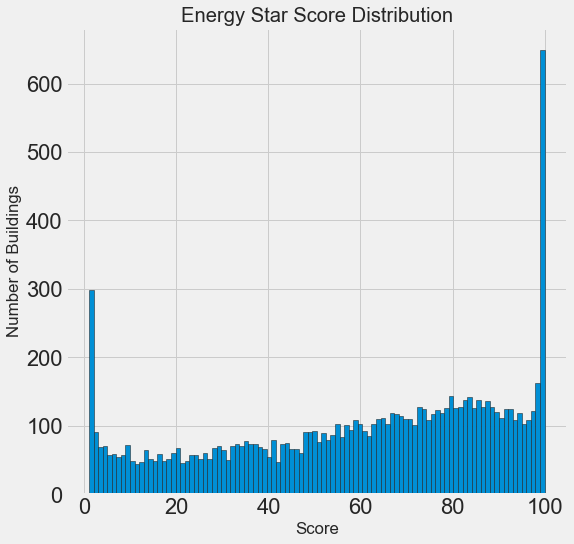

In [76]:
figsize(8, 8)

# 将Energy Star Score 重命名为score
data = data.rename(columns= {'ENERGY STAR Score': 'score'})

# score直方图
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

由于能源之星分数是百分位数，我们预计会看到完全平坦的分布，每个分数占分布的1％（约90个建筑物）。然而，这绝对不是这种情况，因为我们可以看到两个最常见的分数，1和100，构成总分数的不相称的数字。即在两端出现了异常值。

如果我们回到分数的定义，我们会看到它是**基于自我报告**的能量使用情况。这造成了一个问题，因为建筑物所有者可能想要报告较低的用电量以人为地提高他们的建筑物的分数。这就像给学生一个基于自我报告的考试成绩的成绩。这种行为可以解释高比例的建筑物满分为100，但不能解释为什么这么多建筑物在最底层分数！

为了对比能源之星分数，我们可以看一下能源使用强度（EUI），它是总能源消耗除以建筑物的平方英尺。在这里，能源使用量不是自我报告的，因此这可以更加客观地衡量建筑物的能源效率。此外，这不是百分位数，因此绝对值很重要，我们希望它们大致正态分布，可能在低端或高端有一些异常值。

Text(0.5, 1.0, 'Site EUI distribution')

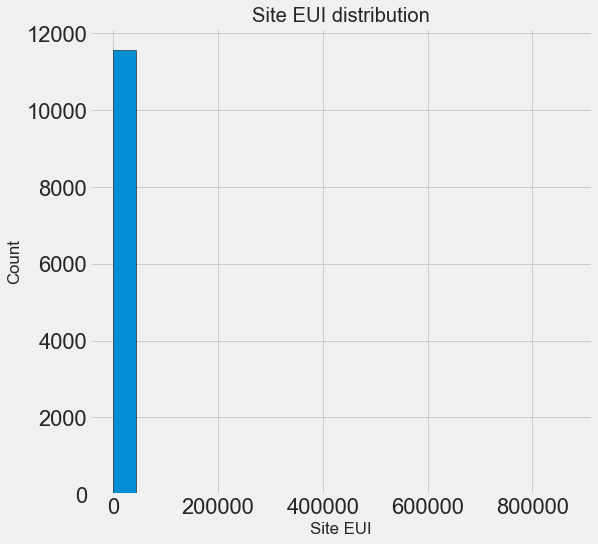

In [77]:
# Site EUI的直方图分布
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI distribution')

这表明我们还有另一个问题：**异常值！** 由于存在一些分数非常高的建筑物，因此图表非常偏斜。 因此我们需要首先处理异常值。我们来看看EUI这个特征的统计数据。

In [78]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [79]:
# 我们看一下EUI特征最大的10个值
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

其中一栋建筑的EUI远高于其他的，我们看一下这个建筑。

In [80]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265.0, :]

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code                        ...                          \
8068       11211                        ...                           

     Source EUI (kBtu/ft²)            Release Date Water Required?  \
8068              912801.1  05/01/2017 11:34:14 PM             NaN   

      DOF Benchmarking Submission Status   Latitude Longitude Community Board  \
8068                       In Compliance  40.716233 -73.94141             1.0   

      Council District  Census Tract  \
8068              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...  

[1 rows x 49 columns]

[异常值](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)可能由于多种原因发生：

- 拼写错误
- 测量设备故障 
- 不正确的单位 
- 或者它们可能是合法的但是极端值。 

异常值可以删除，因为它们并不表示数据的实际分布。

### 2.2 删除异常值
当我们删除异常值时，我们要小心，我们不能因为异常值就直接删除。 它们可能是我们应该进一步调查的实际现象的结果。 当删除异常值时，可以尝试使用[极端异常值](https://people.richland.edu/james/lecture/m170/ch03-pos.html)的定义来处理，这样可以尽可能保守：

- 在低端，极端异常值低于 $\text{First Quartile} -3 * \text{Interquartile Range}$
- 在高端，极端异常值高于 $\text{Third Quartile} + 3 * \text{Interquartile Range}$

在这种情况下，我将只删除单个外围点并查看分布情况。

In [81]:
# 计算第一和第三分位点
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# 计算四分位范围：即第一第三分位之间的范围
iqr = third_quartile - first_quartile

# 去除异常值
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI distribution')

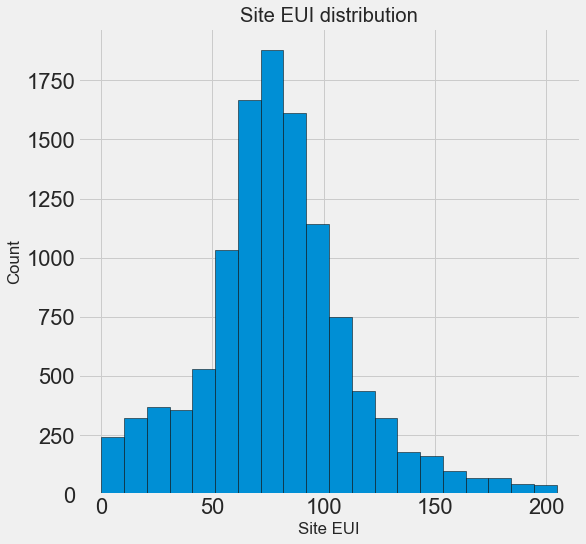

In [82]:
# 重画Site EUI的直方图分布
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI distribution')

删除异常值后，这个直方图分布看起来比较正常，并且接近正态分布，右侧有一条长尾（它有一个正偏斜）。

虽然这可能是一个更客观的衡量标准，但我们的目标仍然是预测能源之星分数，因此我们将回过头来研究该变量。 即使能源之星分数不是一个好的衡量标准，我们仍然需要预测它，这就是我们要做的事情！ 在回到公司的最终报告中，我将指出这可能不是一个客观的衡量标准，并且使用不同的指标来确定建筑物的效率是个好主意。 此外，看看分数为1和100的建筑物可能会很有趣，看看它们是否有任何共同之处。

### 2.3 寻找关系
为了查看**分类变量 - categorical variables**对分数的影响，我们可以通过**分类变量**的值来绘制[**密度图**](https://datavizcatalogue.com/methods/density_plot.html)。 密度图还显示单个变量的分布，可以认为是平滑的直方图。 如果我们通过为**分类变量**密度曲线着色，这将向我们展示分布如何基于类别变化的。

我们将制作的第一个图表显示了`Largest Property Use Type`建筑类型的分布。 为了不使图形混乱，我们将图形限制为在数据集中具有超过100个观测值的建筑类型。

"具有超过100个观测值的建筑类型" 这句话是什么意思呢？ 有的建筑是住宅楼，有的是酒店，有的是写字楼办公楼，有的是医院等等。

如果用作住宅楼的建筑和用作办公楼的建筑都超过100栋了，那我们就把这两种类型的建筑物的分数分布画出来。例如下图中的红色曲线就代表Office这个类型的建筑物的能源之星分数分布

In [83]:
# 统计每个属性值的个数
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types

Multifamily Housing                      7464
Office                                   1157
Hotel                                     202
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   96
Senior Care Community                      85
Distribution Center                        61
Retail Store                               57
Medical Office                             23
Hospital (General Medical & Surgical)      15
Financial Office                           12
Supermarket/Grocery Store                  10
Worship Facility                            9
Refrigerated Warehouse                      8
Wholesale Club/Supercenter                  3
Parking                                     3
Courthouse                                  2
Bank Branch                                 1
Name: Largest Property Use Type, dtype: int64

可以看到，属性值大于100个的有四个：

- Multifamily Housing  
- Office                    
- Hotel                         
- Non-Refrigerated Warehouse         

C:\Users\huangqiancun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

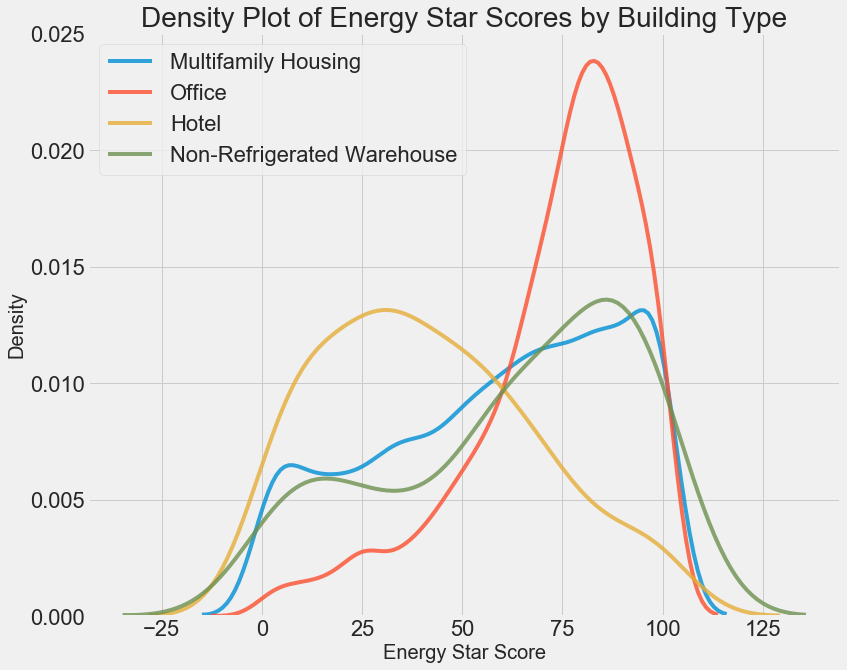

In [84]:
# 取出属性值个数大于100个的属性
types = list(types[types.values > 100].index)

# 建筑类型的密度图
figsize(12,10)

# 绘制每一种建筑类型
for b_type in types:
    # 选出建筑类型
    subset = data[data['Largest Property Use Type'] == b_type]
    # 绘制对应建筑类型的分数密度图
    sns.kdeplot(subset['score'].dropna(), label = b_type, shade = False, alpha = 0.8)

plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

从该图中，我们可以看到建筑类型确实对分数有影响（图上的负分数是[核密度估计过程](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/)的人工产物）。 虽然我最初将重点放在用于预测分数的数字列上，但此图表告诉我们应该包含属性类型，因为此信息可用于确定分数。 **由于建筑类型是一个分类变量，因此在将其输入机器学习模型之前，必须对其进行独热编码。**

为检查另一个分类变量，行政区`Borough`，我们可以制作类似的图表。

In [85]:
# 统计每个属性值的个数
boroughs = data.dropna(subset = ['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs

Manhattan        3985
Brooklyn         1947
Queens           1707
Bronx            1655
Staten Island     119
Name: Borough, dtype: int64

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

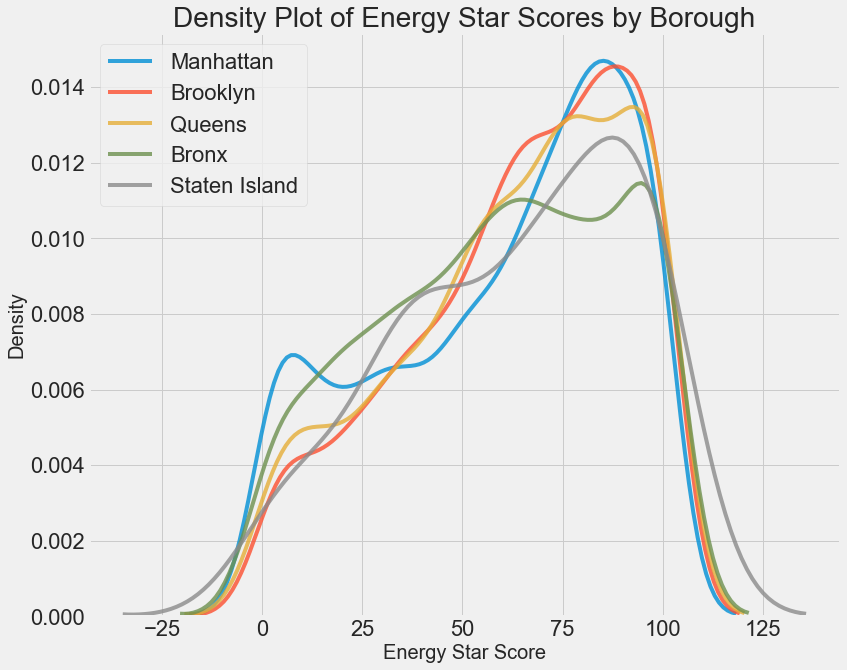

In [86]:
# 取出属性值个数大于100个的属性
boroughs = list(boroughs[boroughs.values > 100].index)

# Borough类型的密度图
figsize(12,10)

# 绘制每一种Borough类型
for borough in boroughs:
    # 选出Borough类型
    subset = data[data['Borough'] == borough]
    # 绘制对应Borough类型的分数密度图
    sns.kdeplot(subset['score'].dropna(), label = borough, shade = False, alpha = 0.8)

plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)

建筑的`Borough`似乎没有像建筑`type`那样在分数分布上产生显着差异。 尽管如此，将`Borough`纳入分类变量可能是有意义的。

### 2.4 特征变量和目标变量的关系
为了量化特征（变量）和目标之间的相关性，我们可以计算[Pearson相关系数](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/)。 这是两个变量之间线性关系的强度和方向的度量：值-1表示两个变量完全负线性相关，值+1表示两个变量完全正线性相关。

尽管特征和目标之间可能存在非线性关系，并且相关系数不考虑特征之间的相互作用，但线性关系是开始探索数据趋势的好方法。 然后，我们可以使用这些值来选择要在我们的模型中使用的特征。

下面的代码计算所有变量和目标变量`score`之间的相关系数。

In [87]:
# 计算所有变量和score的相关系数
correlations_data = data.corr()['score'].sort_values()

# 最负相关的15个特征
print(correlations_data.head(15))

print('===================================')

# 最正相关的15个特征
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

可以看到，有几个特征与目标变量`score`存在强负相关关系，与`score`最负相关的是：

- Energy Use Intensity (EUI)
- Site EUI (kBtu/ft²)
- Weather Normalized Site EUI (kBtu/ft²)（这些只在计算方式上略有不同）。 

EUI是建筑使用的能量除以建筑物的平方英尺，并且用于衡量建筑物的效率，其中分数越低越好。 直观地说，这些相关性是有意义的：**随着EUI的增加，能源之星分数`score`趋于下降。**

为了考虑可能的非线性关系，我们可以采用**特征的平方根和自然对数变换**，然后用分数计算相关系数。 为了尝试捕获行政区`Borough`或建筑`type`之间的任何可能的关系（这两个特征是类别变量）和分数，我们将对这些特征进行**独热编码。**

在下面的代码中，我们采用以下策略：

- 对数值特征：进行平方根和对数变换；
- 对两个类别变量（`Borough`和`type`）进行独热编码；
- 最后计算所有特征与`score`之间的相关性，并显示前15个 最积极的和前15个最负相关。 

In [88]:
# 选择数值特征
numeric_subset = data.select_dtypes('number')

# 创建平方根和对数列
for col in numeric_subset.columns:
    # 跳过 Energy Star Score 列
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# 选择类别特征
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# 独热编码
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat对两个数据帧进行拼接，axis=1列绑定
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# 去掉没有评分的建筑物
features = features.dropna(subset = ['score'])

# 计算特征与score之间的相关性
correlations = features.corr()['score'].dropna().sort_values()


C:\Users\huangqiancun\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\huangqiancun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\huangqiancun\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [89]:
# 显示最负相关的15个特征
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [90]:
# # 显示最正相关的15个特征
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

在进行非线性转换特征之后：

- 最强的特征仍然是与能量使用强度（EUI）相关的特征。 
- 对数和平方根变换似乎没有产生任何更强的特征。 
- 尽管我们确实看到建筑类型的办公室（`Largest Property Use Type_Office` ）与`score`略微正相关，但没有强烈的正线性关系。此变量是建筑类型的分类变量的独热编码表示。

我们可以使用这些相关性来执行特征选择。 现在，让我们绘制数据集中最重要的相关性（就绝对值而言），即`Site EUI (kBtu/ft²) `。 我们可以通过建筑类型为图形着色，以显示它如何影响关系。

### 2.5 双变量分析
为了可视化两个变量之间的关系，我们使用散点图。我们还可以使用标记的颜色或大小等方面包含其他变量。在这里，我们将绘制两个数值变量，并使用颜色表示第三个分类变量。

C:\Users\huangqiancun\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

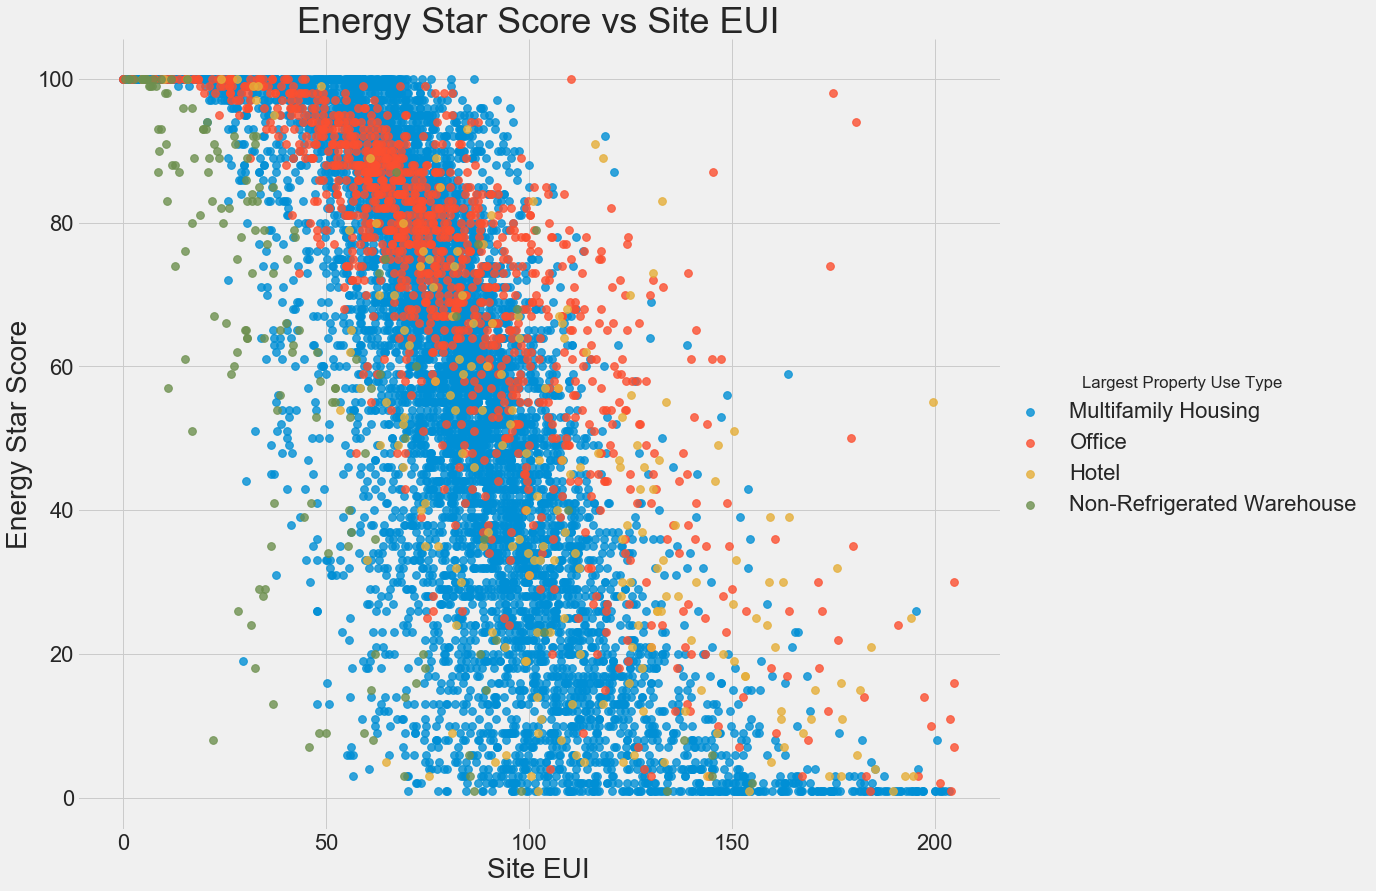

In [91]:
figsize(12, 10)

# 提取建筑类型特征
features['Largest Property Use Type'] = data.dropna(subset=['score'])['Largest Property Use Type']

# 限制只取观测值大于100的建筑类型 (从前面的代码)
features = features[features['Largest Property Use Type'].isin(types)]

# 利用seaborn画score和Site EUI的回归散点图
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);
plt.xlabel('Site EUI', size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)

`Site EUI`与`score`之间存在明显的负相关关系。 这种关系不是完全线性的（相似系数为-0.7，但看起来这个特征对预测建筑物的`score`很重要。

### 2.6 多变量分析（pairs plot）
我们还可以在几个不同的变量之间建立Pairs Plot。 Pairs Plot是一次检查多个变量的好方法，因为它显示了对角线上的变量对和单个变量直方图之间的散点图。

使用seaborn PairGrid函数，我们可以将不同的图绘制到网格中:

- 上三角：散点图
- 对角线：直方图
- 下三角：两个变量之间的相关系数和两个变量的2-D核密度估计。

C:\Users\huangqiancun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


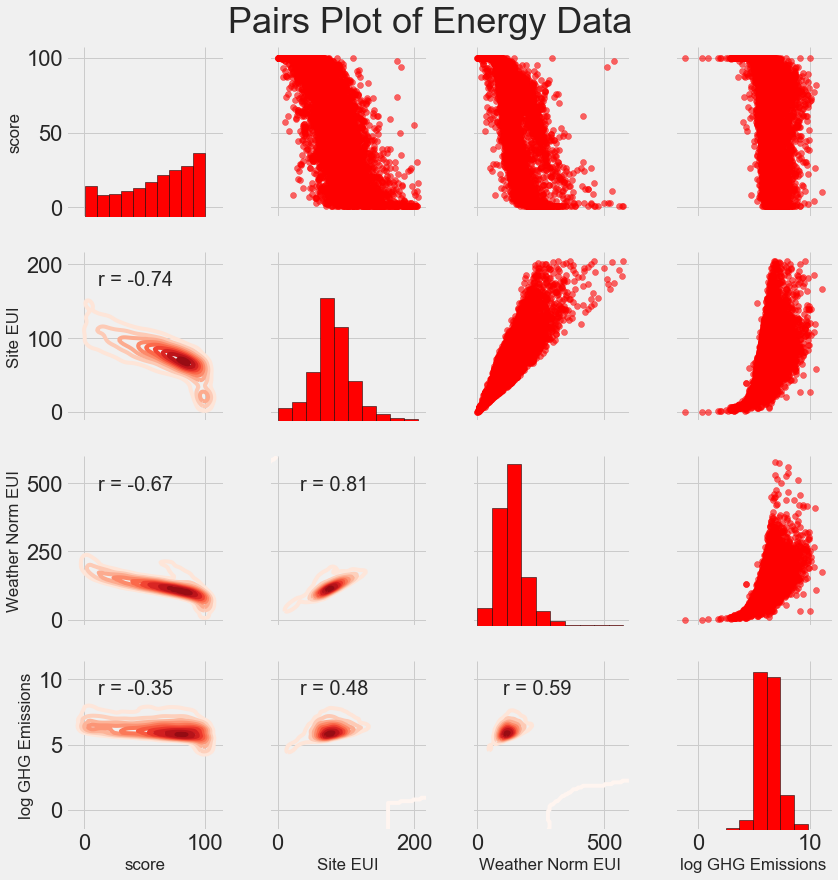

In [92]:
# 提取需要绘制的变量
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# 使用nan代替inf
plot_data = plot_data.replace({np.inf: np.nan, -np.inf:np.nan})

# 重命名列
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})
# 删除缺失值
plot_data = plot_data.dropna()

# 用于计算两个特征的相关系数的函数
def corr_func(x, y, **kwargs):
    # 计算皮尔逊积矩相关系数
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# 创建绘图网格矩阵
grid = sns.PairGrid(data = plot_data, size = 3)

# 上三角：散点图
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# 对角线：直方图
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# 下三角：两个变量之间的相关系数和两个变量的2-D核密度估计
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# 整张图的标题
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

为了解释图中的关系，我们可以查找一行中的变量与一列中的变量相交的位置。 例如，

- 要查找`score`与`log of GHG Emissions`之间的关系，我们会查看`score`列和 `log of GHG Emissions`行。在交叉点（左下图），我们看到分数与该变量的相关系数为-0.35。如果我们查看对应的右上角图，我们可以看到这种关系的散点图。

- 同样，要查看`Weather EUorm EUI`与`score`的相关性，我们查看`Weather EUorm EUI`行和`score`列，可以看到相关系数为-0.67。

## 3 特征工程和特征选择
现在我们已经探索了数据中的趋势和关系，我们可以为我们的模型设计一组功能。 我们可以使用EDA的结果来进行特征工程。 特别是，我们从EDA学到了以下知识，可以帮助我们设计/选择特征：

- 分数`score`分布因建筑类型`type`而异，并且在较小程度上因行政区`Borough`而异。 因此我们不仅需要关注数值特征，还应该在模型中包含这两个类别特征；
- 对特征进行对数或平方根变换不会导致特征与分数之间的线性相关性显着增加。

在我们进一步讨论之前，我们应该理解特征工程和特征选择，这些定义是非正式的，并且有相当大的重叠，但我喜欢将它们视为两个独立的过程：

- __[特征工程](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__: 获取原始数据并提取或创建新特征的过程，这些特征允许机器学习模型学习这些特征与目标之间的映射。 这可能意味着对变量进行转换，例如我们对数值特征进行对数和平方根转换，或者对类别变量使用独热编码，以便可以在模型中使用它们。 通常，我认为特征工程是**添加**从原始数据派生的附加特征。
- __[特征选择](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__: 选择数据中最相关特征的过程。 “最相关”可能取决于许多因素，但它可能与目标的最高相关性或具有最大差异的特征[most variance](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)。 在特征选择中，我们会删除对模型学习无用的特征。 这可以帮助模型更好地概括新数据并产生更可解释的模型。 一般来说，我认为特征选择是减去特征，所以我们只留下最重要的特征。


特征工程和选择是迭代过程，通常需要多次尝试才能得到较好的结果。 通常，我们将使用建模结果（例如来自随机森林的特征重要性排序）返回并重做特征选择，或者需要创建新特征的关系。 此外，这些过程通常包含领域知识和数据统计质量的混合。

[特征工程和选择](https://www.featurelabs.com/blog/secret-to-data-science-success/) 对于获得一个高精度的机器学习模型至关重要。 它可能需要耗费很长时间，但通常比用于模型的算法和超参数选择更重要。 如果我们不为模型提供正确的数据，那么我们将其视为失败，我们不应期望它能够学习！

在本项目中，我们将采用以下步骤进行特征工程：

- 仅选择数值变量和两个分类变量（行政区`borough`和建筑物类型`property use type`）
- 对数值变量进行对数变换
- 对类别变量进行One-hot编码

对于特征选择，我们将执行以下操作：

- 删除[共线性特征](https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/)

当我们进行特征选择时，我们将讨论共线性（也称为[多重共线性](https://en.wikipedia.org/wiki/Multicollinearity)）！

以下代码选择数值特征，并进行对数变换，选择类别特征进行独热编码，并将特征拼接在一起。

In [93]:
# 复制原始数据
features = data.copy

# 选择数值特征
numeric_subset = data.select_dtypes('number')

# 对每一个数值特征进行对数变换
for col in numeric_subset.columns:
    # score为要预测的目标变量，跳过
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# 选择类别特征
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# 进行独热编码
categorical_subset = pd.get_dummies(categorical_subset)

# 列拼接，axis = 1
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.shape

C:\Users\huangqiancun\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\huangqiancun\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


(11319, 110)

此时，我们有11319个观测（建筑物），具有109个不同的特征（其中一列是分数`score`）。 并非所有这些特征对于预测分数有帮助，其中一些特征也许是多余的，因为它们具有高度相关性。 我们将在下面讨论第二个问题。

### 3.1 删除共线性特征
高共线特征在它们之间具有显着的相关系数。 例如，在我们的数据集中，`Site EUI`和`Weather Normalized Site EUI`高度相关，因为它们只是略微不同的计算能源使用强度的方法。

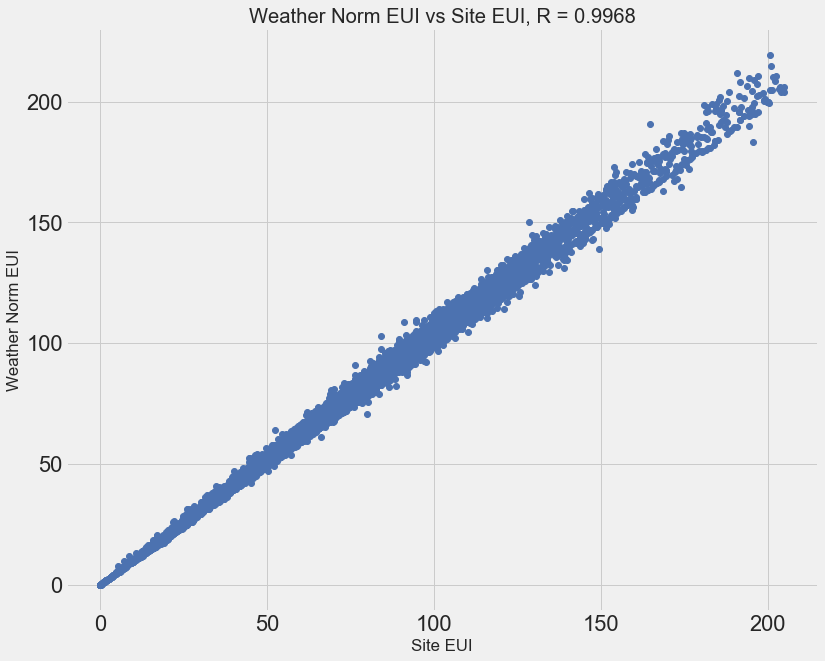

In [94]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()
plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

高度共线性的特征可能是多余的，我们只需保留其中一个特征即可为模型提供必要的信息。

删除共线性特征是一种通过减少特征数量来降低模型复杂性的方法，可以提高模型泛化能力。 它还可以帮助我们解释模型，因为我们只需要考虑单一变量，例如EUI，而不是 EUI 和 weather normalized EUI 如何影响分数。

有许多方法可以消除共线特征，例如使用[方差膨胀因子](http://www.statisticshowto.com/variance-inflation-factor/)。 我们将使用更简单的度量，并删除具有高于某个阈值的相关系数的特征（不是分数，因为我们需要与分数高度相关的特征！）有关删除共线性特征的更全面的讨论， 可以看Kaggle的这个[notebook](https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/code)。

以下代码通过删除所比较的两个特征之一，根据我们为相关系数选择的阈值来移除共线性特征。 它还会打印它删除的相关性，以便我们可以看到调整阈值的效果。 我们将使用0.6的阈值，如果特征之间的相关系数超过该值，则删除一对特征中的一个。

代码改编自[Stack Overflow的答案](https://stackoverflow.com/a/43104383)。

In [95]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # 不要删除与目标变量score之间的相关性
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # 计算相关性矩阵
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 遍历相关性矩阵并进行比较
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果有相关性超过阈值
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # 删除每对相关特征中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # 删除具有明显相关性的特征，知识计算方式不同     
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # 将目标变量添加回数据帧
    x['score'] = y
               
    return x

In [96]:
# 删除相关系数大于指定阈值的特征
features = remove_collinear_features(features, 0.6)

Weather Normalized Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 0.83
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.81
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.85
Natural Gas Use (kBtu) | Largest Property Use Type - Gross Floor Area (ft²) | 0.61
Weather Normalized Site Natural Gas Use (therms) | Largest Property Use Type - Gross Floor Area (ft²) | 0.61
Electricity Use - Grid Purchase (kBtu) | DOF Gross Floor Area | 0.63
Electricity Use - Grid Purchase (kBtu) | Largest Property Use Type - Gross Floor Area (ft²) | 0.67
Weather Normalized Site Electricity (kWh) | DOF Gross Floor Area | 0.66
Weather Normalized Site Electricity (kWh) | Largest Property Use Type - Gross Floor Area (ft²) | 0.66
Total GHG Emissions (Metric Tons CO2e) | DOF Gross Floor Area | 0.75
Total GHG Emissions (Metric Tons CO2e) | Largest Property Use Type - Gross Floor Area (ft²) | 0.79
Total GHG Emissions (Metric Tons 

C:\Users\huangqiancun\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


 | Order | 0.92
log_Council District | Council District | 0.91
log_Council District | log_Order | 0.79
log_Census Tract | Census Tract | 0.78
Borough_Bronx | Latitude | 0.62
Borough_Bronx | Longitude | 0.69
Borough_Bronx | log_Latitude | 0.62
Borough_Brooklyn | Latitude | 0.74
Borough_Brooklyn | Council District | 0.89
Borough_Brooklyn | log_Latitude | 0.74
Borough_Brooklyn | log_Council District | 0.75
Borough_Manhattan | Order | 0.81
Borough_Manhattan | Council District | 0.78
Borough_Manhattan | log_Order | 0.63
Borough_Manhattan | log_Council District | 0.84
Borough_Queens | Order | 0.62
Largest Property Use Type_Office | Largest Property Use Type_Multifamily Housing | 0.63


In [97]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

我们的最终数据集有64个特征（其中一列是目标`score`）。 这仍然不少，但主要是因为我们有一个独热编码的分类变量。 

- 诸如线性回归之类的模型可能存在大量特征，
- 但诸如随机森林之类的模型执行隐式特征选择并自动确定在训练期间哪些特征是重要的。 

还有其他特征选择步骤，但是现在我们将保留我们拥有的所有特征用于训练模型并检验模型的性能。

**其他选择选择方法**
还有很多[特征选择](http://scikit-learn.org/stable/modules/feature_selection.html)的方法，比如[主成分分析（PCA）](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)，其将特征降低为若干个最大方差的维度，或[独立成分分析（ICA）](http://cs229.stanford.edu/notes/cs229-notes11.pdf)，其旨在在一组特征中找到独立源。 然而，虽然这些方法在减少特征数量方面是有效的，但它们创造了没有物理意义的新特征，因此几乎不可能解释模型。

这些方法对于处理高维数据非常有用，[更多相关内容](https://machinelearningmastery.com/feature-selection-machine-learning-python/)。

### 3.2 训练集和测试集的划分
在机器学习中，我们通常需要将我们的数据分为两组：

- 训练集：有特征和目标值的，用于学习特征和目标之间的映射。
- 测试集：用于验证模型的效果，该模型从未在测试集上看到过目标值，而是必须使用这些特征进行预测。当我们知道测试集的真实答案时，我们可以将测试预测值与真实值进行比较，以估计我们的模型在现实世界中部署时的表现。

本项目中，我们将首先提取所有没有`Energy Star Score`能源之星分数的建筑物（我们不知道这些建筑物的真实答案，因此它们对训练或测试没有帮助）。然后，我们将有分数的建筑物分成70&的训练集和30%的测试集。

使用scikit-learn将数据随机拆分为训练和测试集很简单。我们可以设置拆分的`random_state`以确保一致的结果。

In [98]:
# 将数据按照有无score分类
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [99]:
# 将特征和目标变量拆分
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# 为了方便后续的填充，用np.nan替换np.inf和-np.inf
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# 划分70%的训练集和30%的测试集
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(6622, 64)
(6622, 1)
(2839, 64)
(2839, 1)


我们有1858座没有分数的建筑；有分数的建筑中，6622座用作训练集，2839座用作测试集中，接下来建立一个naive 的 baseline以在后续模型中不断优化。

### 3.3 建立一个baseline
在我们开始建立机器学习模型之前建立一个naive的基线是很重要的。

如果我们构建的模型不能胜过naive的猜测，那么我们可能不得不承认机器学习不适合这个问题。 这可能是因为我们没有使用正确的模型，需要更多的数据，或者因为有一个更简单的解决方案，不需要机器学习。 

建立基线至关重要，因此我们最终可能不会去建立机器学习模型，只是意识到我们无法真正解决问题。

对于回归任务，良好的基线是使用训练集上目标的中值作为所有所有测试集样本的预测值。这很容易实现，并为我们的模型设置了相对较低的标准：如果它们不能比猜测的中值更好，那么我们需要重新思考我们的方法。

**度量标准：平均绝对误差**
机器学习任务中使用了许多指标，很难知道[选择哪一个指标](https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/)。 大多数情况下，它将取决于特定问题，如果有一个特定的目标来优化。 [Andrew Ng](https://www.coursera.org/learn/machine-learning-projects/lecture/wIKkC/single-number-evaluation-metric)建议使用单个实值性能指标来比较模型，因为它简化了评估过程。 我们应该使用一个数字，而不是计算多个指标并尝试确定每个指标的重要程度。 

在这种情况下，因为我们进行回归，所以[平均绝对误差](https://people.duke.edu/~rnau/compare.htm)是适当的度量。 这也是可以解释的，因为它表示我们的估计的平均分数数量，并且与目标值的单位相同

下面的函数计算真实值和预测值之间的平均绝对误差。

In [100]:
# 计算平均绝对误差的函数
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

现在我们可以做中值猜测并用于测试集。

In [101]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


这表明我们对测试集的平均估计偏差约25%。 因为分数在1到100之间，因此这意味着来自baseline的平均误差约25%。猜测训练集中值的naive方法为我们的后续的模型提供了一个低基线！

### 3.4 小结
到目前为止，我们完成了开头所说[机器学习工作流程](https://towardsdatascience.com/the-7-steps-of-machine-learning-2877d7e5548e?gi=30cd995093a9)的前三个步骤：

1. 数据清理和格式化
2. 探索性数据分析
3. 特征工程和选择

我们还完成了建立基线指标的关键任务，以便我们确定我们的模型是否比猜测更好！

以上我们了解了流程中的每个部分是如何流入下一个部分的：

- 清理数据并将其转换为正确的格式允许我们执行探索性数据分析(EDA)；
- EDA的结果辅助我们进行特征工程和选择。

这三个步骤通常按此顺序执行，但我们可能会稍后再回来，根据我们的建模结果进行更多的EDA或特征工程。数据科学是一个迭代过程，我们一直在寻找改进以前工作的方法。这意味着我们不必第一次完成任务（尽管我们可以尽力），因为一旦我们对问题有了更多的了解，总有机会重新审视我们的决策。

接下来，我们将重点实现几种机器学习方法，选择最佳模型，并使用交叉验证的超参数调整方法优化我们的问题。

同时，把我们处理过的数据集保存起来，以便在后续步骤中再次使用。

In [102]:
# 保存没有分数的数据集，训练集，测试集
no_score.to_csv('dataset/no_score.csv', index = False)
X.to_csv('dataset/training_features.csv', index = False)
X_test.to_csv('dataset/testing_features.csv', index = False)
y.to_csv('dataset/training_labels.csv', index = False)
y_test.to_csv('dataset/testing_labels.csv', index = False)

## 4 评估和比较机器学习模型
### 4.1 导入库文件
在本项目中，我们使用各种标准的数据科学和机器学习库。

In [103]:
# 缺失值填充和最大最小归一化处理
from sklearn.preprocessing import Imputer, MinMaxScaler

# 机器学习模型
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 超参数调整
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### 4.2 导入数据
读取前面部分处理好的数据。

In [104]:
# 使用数据帧读取数据
train_features = pd.read_csv('dataset/training_features.csv')
train_labels = pd.read_csv('dataset/training_labels.csv')
test_features = pd.read_csv('dataset/testing_features.csv')
test_labels = pd.read_csv('dataset/testing_labels.csv')

# 数据维度
print('Training Feature Size:', train_features.shape)
print('Training Labels Size:', train_labels.shape)
print('Testing Feature Size:', test_features.shape)
print('Testing Labels Size:', test_labels.shape)

Training Feature Size: (6622, 64)
Training Labels Size: (6622, 1)
Testing Feature Size: (2839, 64)
Testing Labels Size: (2839, 1)


这是格式化后的数据。 在前文，我们对数值特征进行了对数变换，对两个类别特征进行独热编码，并通过删除高共线特征来选择特征子集。

In [105]:
train_features.head(12)

Order  Property Id  DOF Gross Floor Area  Year Built  \
0   13276      5849784               90300.0        1950   
1    7377      4398442               52000.0        1926   
2    9479      4665374              104700.0        1954   
3   14774      3393340              129333.0        1992   
4    3286      2704325              109896.0        1927   
5    1060      2430725              182655.0        1929   
6   10846      5737475               65400.0        1942   
7    4280      2670505              113150.0        1938   
8   12974      2964670              137700.0        1959   
9   13244      4414693               63693.0        1941   
10   3903      2669664               82644.0        1922   
11   8336      2809354               51317.0        1925   

    Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
0                                     1        100                126.0   
1                                     1        100                 95.4   
2                                     1        100                 40.4   
3                                     1        100                157.1   
4                                     1        100                 62.3   
5                                     1         90                 52.9   
6                                     1        100                 66.8   
7                                     1        100                 78.4   
8                                     1        100                 63.0   
9                                     1        100                 97.8   
10                                    1        100                 55.4   
11                                    1        100                118.7   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                                 5.2         
1                                                 4.7         
2                                                 3.8         
3                                                16.9         
4                                                 3.5         
5                                                 9.7         
6                                                 3.0         
7                                                 5.7         
8                                                 3.4         
9                                                 4.3         
10                                                4.5         
11                                                3.6         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                 1.2            
1                                                 0.9            
2                                                 0.3            
3                                                 1.1            
4                                                 0.0            
5                                                 0.2            
6                                                 0.6            
7                                                 NaN            
8                                                 0.5            
9                                                 0.8            
10                                                0.0            
11                                                1.1            

    Water Intensity (All Water Sources) (gal/ft²)  \
0                                           99.41   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                           28.65   
5                                            4.80   
6                                           67.14   
7                                           30.73   
8                                           41.96   
9                                     

`training_labels`包含能源之星分数，这是我们机器学习问题的目标。 能源之星评分是对建筑物能效的比较测量。

这是能源之星分数的分布。

Text(0.5, 1.0, 'Energy Star Score Distribution')

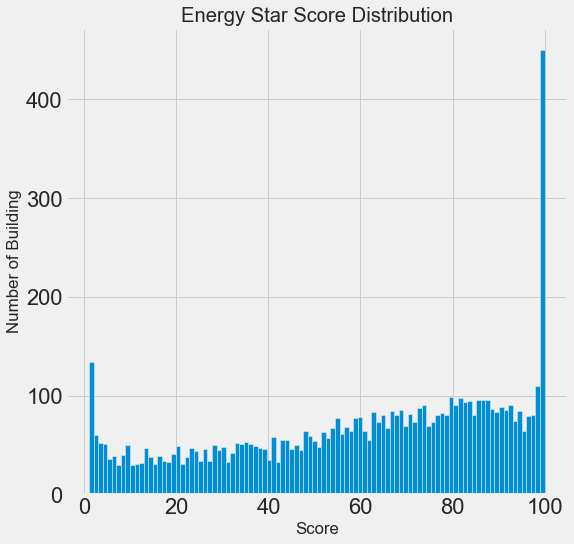

In [106]:
figsize(8, 8)

# score的直方图分布
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score')
plt.ylabel('Number of Building')
plt.title('Energy Star Score Distribution')

### 4.3 评估和比较机器学习模型
在本节中，我们将为我们的监督回归任务构建、训练及评估几种机器学习方法。 目标是确定哪个模型最有希望进一步开发（例如超参数调整）。

我们使用平均绝对误差作为指标来比较模型。 从**3.3节**可知随机猜测分数中值的基线模型平均偏离25分。

#### 4.3.1 填充缺失值
通常机器学习模型无法处理缺失值，这意味着我们必须找到一种方法来填充或忽略任何缺少值的特征。由于我们在**1.4节**已经删除了缺失值超过50%的特征，因此我们将重点[填充剩下特征的缺失值](https://en.wikipedia.org/wiki/Imputation_(statistics))。有许多填充方法，但在这里我们将使用相对简单的方法用列的中位数替换缺失值。 （[这是关于缺失值填充的更全面的讨论](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)）

在下面的代码中，我们创建一个[Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) `Imputer`对象，用列的中值填充缺失值。请注意，我们只在训练数据上使用Imputer.fit，但在测试数据集没有使用。然后我们使用`Imputer.transform`同时处理训练数据集和测试数据集。这意味着测试集中的缺失值用训练集中相应列的中值填充。[我们必须现在这么做而不是部署时](https://stackoverflow.com/a/46692001)，我们必须根据训练数据集将测试集的缺失值填充。这是避免[数据泄漏](https://www.kaggle.com/dansbecker/data-leakage)问题的一种方法，数据泄露指来自测试集的信息“泄漏”到训练过程中。

In [107]:
# 使用中位数填充策略创建一个imputer对象
imputer = Imputer(strategy = 'median')

# imputer对象作用于训练集
imputer.fit(train_features)

# 转换训练数据和测试数据
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

C:\Users\huangqiancun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [108]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [109]:
# 保证所有数字都是有限值
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


在填充之后，所有特征都是实值的。 对于更复杂的缺失值处理方法（尽管中值通常很有效），[请查看本文](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146)

#### 4.3.2 特征缩放
在我们构建模型之前要采取的最后一步是[特征缩放](https://en.wikipedia.org/wiki/Feature_scaling)。这是必要的，因为特征之间具有不同的单位度量，我们希望对特征进行标准化，以使单位不影响算法的结果。

- [线性回归和随机森林不需要特征缩放](https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data)
- 但是其他方法（例如支持向量机和kNN）需要进行特征缩放，因为它们考虑了样本之间的欧几里德距离。因此，在比较多个算法时，最佳做法是进行特征缩放。

有两种常用的特征缩放方法：

1. 对于每个值，减去特征的平均值并除以特征的标准偏差。这称为标准化，并且导致每个特征具有0均值和1标准差。
2. 对于每个值，减去特征的最小值并除以最大值减去最小值（范围）。这确保了特征的所有取值都在0和1之间，这称为归一化。

这是一篇关于[规范化和标准化](https://machinelearningmastery.com/normalize-standardize-machine-learning-data-weka/)的好文章。

与缺失值处理一样，当我们进行特征缩放时，我们只使用训练集计算缩放对象。当我们转换特征时，我们将转换训练集和测试集。

In [110]:
# 创建（0,1）之间的缩放对象
scaler = MinMaxScaler(feature_range=(0, 1))

# 拟合训练集
scaler.fit(X)

# 对训练集和测试集进行变换
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [111]:
# 将y转换为一维数组
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [112]:
y.shape

(6622,)

### 4.4 评估模型
我们将使用[Scikit-Learn库](http://scikit-learn.org/stable/)比较五种不同的机器学习模型：

1. 线性回归
2. 支持向量机回归
3. 随机森林回归
4. 梯度提升回归
5. K-Nearest Neighbors回归

在本节，我专注于模型实现过程，而不是解释这些模型是如何工作的。除了动手机器学习之外，阅读机器学习模型的另一个重要资源（这是免费的在线）是[统计学习简介](http://www-bcf.usc.edu/~gareth/ISL/)。

为了比较模型，我们将主要使用模型超参数的Scikit-Learn默认值。通常这些将表现得很好，但应该在实际使用模型之前进行优化。首先，我们只想确定每个模型的基线性能，然后我们可以选择性能最佳的模型，再使用超参数调整进一步优化。请记住，默认的超参数将启动并运行模型，但几乎总是应该使用某种搜索来调整以找到问题的最佳设置！

以下是Scikit-learn文档中有关[默认值](https://arxiv.org/abs/1309.0238)的内容：

    __Sensible defaults__: Whenever an operation requires a user-defined parameter,an appropriate default value is defined by the library. The default value should cause the operation to be performed in a sensible way (giving a baseline solution for the task at hand.)
   
关于scikit-learn的最大的特点是所有模型都以相同的方式实现：一旦你知道如何构建一个模型，你就可以实现一系列极其多样化的模型。在这里，我们将用几行代码实现多个模型。

In [113]:
# 计算平均绝对误差的函数
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# 模型训练和预测过程，输入任意模型，输出mae
def fit_and_evaluate(model):
    # 训练模型
    model.fit(X, y)
    
    # 预测和评估
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # 返回误差指标
    return model_mae

In [114]:
# 线性回归
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [115]:
# 支持向量回归
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [116]:
# 随机森林
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

C:\Users\huangqiancun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 10.0073


In [117]:
# 梯度提升回归
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0144


In [118]:
# k近邻回归
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


Text(0.5, 1.0, 'Model Comparison on Test MAE')

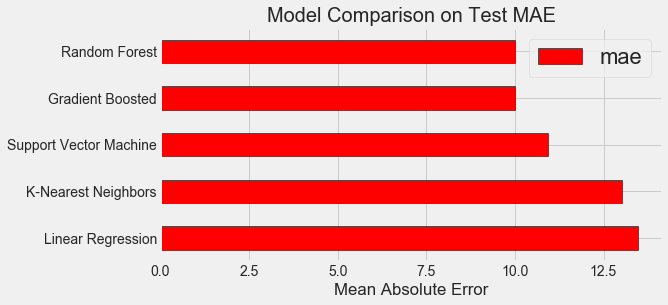

In [119]:
# 可视化比较不同模型的结果
figsize(8, 4)

# 保存结果的数据帧
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# 直方图
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

- 根据模型结果比较（每次结果会略有变化），随机森林表现最佳，其次是梯度提升回归。
- 然而这不是最公平的比较，因为我们主要使用默认的超参数。特别是使用支持向量回归器，超参数对性能有显着影响。 （随机森林和梯度提升方法非常适合开始，因为性能较少依赖于模型设置）。
- 尽管如此，从这些结果中，我们可以得出结论，**机器学习是适用的，因为所有模型都明显优于基线（3.3节25%的mae）！**

接下来，我将专注于使用超参数调整来优化最佳模型。鉴于此处的结果，我将专注于使用`Gradient Boosting Regressor`。因为[Gradient Boosted Trees](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)的Scikit-Learn实现，在过去的几年中赢得了许多[Kaggle](http://matthewemery.ca/Why-Kagglers-Love-XGBoost/)比赛。 Scikit-Learn版本通常比XGBoost版本慢，但在这里我们将坚持使用Scikit-Learn，因为语法更为熟悉。这是[XGBoost包中使用实现的指南](https://www.kaggle.com/dansbecker/learning-to-use-xgboost/code)。

## 5 模型优化
在机器学习中，优化模型意味着为特定问题找到最佳的超参数集。

### 5.1 超参数
首先，我们需要了解哪些模型超参数与模型参数的对比：

- 模型超参数被认为是机器学习算法的设置，在训练之前由数据科学家调整。例如，随机森林中的树的数量，或者K Nearest Neighbors Regression中使用的近邻数量。
- 模型参数是模型在训练期间学习的内容，例如线性回归中的权重。

我们通过选择超参数来控制模型，这些选择会对模型的最终性能产生重大影响（尽管通常不会像获取更多数据或特征工程那么有效）。

[调整模型超参数](http://scikit-learn.org/stable/modules/grid_search.html)可以控制模型欠拟合与过拟合的平衡。

- 我们可以尝试通过**更复杂的模型来校正欠拟合**，例如在随机森林中使用更多树或在深度神经网络中使用更多层。不合适的模型具有高偏差，并且当我们的模型没有足够的容量（自由度）来学习特征和目标之间的关系时发生。
- 我们可以通过**限制模型的复杂性和应用正则化来尝试纠正过拟合**。这可能意味着降低多项式回归的阶数，或将dropout 层添加到深度神经网络。过拟合的模型具有高方差并且实际上记忆了训练集。

**欠拟合和过拟合都会导致测试集上的泛化性能变差。**

选择超参数的问题在于，没有任何超参数可以在所有问题中发挥最佳效果。因此，对于每个新数据集，我们必须找到最佳设置。这可能是一个耗时的过程，但幸运的是，在Scikit-Learn中执行此过程的方法有多种选择。更好的是，新的库，例如epistasis labs的[TPOT](https://epistasislab.github.io/tpot/)，旨在自动完成此过程！本项目中，我们将坚持在Scikit-Learn中手动完成，但请继续关注自动模型选择的文章！

### 5.2 使用随机搜索和交叉验证进行超参数调整

我们可以通过随机搜索和交叉验证为模型选择最佳超参数。

随机搜索是指我们选择超参数来评估模型的方法：
- 我们定义一系列选项，然后随机选择要尝试的组合。这与网格搜索形成对比，网格搜索评估我们指定的每个组合。
- 通常，当我们对最佳模型超参数的知识有限时，随机搜索会更好，我们可以使用随机搜索缩小选项范围，然后使用更有限的选项范围进行网格搜索。

交叉验证是用于评估超参数性能的方法：
- 我们使用K-Fold交叉验证，而不是将数据集拆分为单独训练集的和验证集，以减少我们可以使用的训练数据量。
- 将训练数据划分为K个部分，然后遍历迭代过程，其中我们首先在K-1个数据集上训练，然后评估在第k个数据集的性能。
- 重复这个过程K次，所以最终我们将测试训练数据中的每个例子，关键是每次迭代我们都在测试我们没有训练过的数据。
- 在K折交叉验证结束时，我们将每次K次迭代的平均误差作为最终性能度量，然后在所有训练数据上训练模型。然后，我们记录的性能用于比较超参数的不同组合。

使用k = 5的k折交叉验证图片如下所示：
![](images/kfold_cv.png)

在这里，我们将使用交叉验证实现随机搜索，以选择`梯度梯度回归模型`的最佳超参数。 我们首先定义一个网格然后执行迭代过程：从网格中随机抽样一组超参数，使用4折交叉验证评估超参数，然后选择具有最佳性能的超参数。

当然我们实际上并没有自己做这个迭代，我们让Scikit-Learn和`RandomizedSearchCV`为我们完成这个过程！

In [120]:
# 损失函数 均方差"ls", 绝对损失"lad", Huber损失"huber"
loss = ['ls', 'lad', 'huber']

# 提升过程使用的树的数量
n_estimators = [100, 500, 900, 1100, 1500]

# 每棵树的最大深度
max_depth = [2, 3, 5, 10, 15]

# 每个叶子节点的最少样本
min_samples_leaf = [1, 2, 4, 6, 8]

# 拆分节点的最小样本数
min_samples_split = [2, 4, 6, 10]

# 分割时要考虑的最大特征的数量
max_features = ['auto', 'sqrt', 'log2', None]

# 定义要进行超参数搜索的网络
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

我们选择了6个不同的超参数来调整GBDT回归。 这些都将以不同的方式影响模型，这些方法很难提前确定，找到特定问题的最佳组合的唯一方法是测试它们！ 要了解超参数，可以查看[Scikit-Learn文档](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)。现在，只要知道我们正在努力寻找超参数的最佳组合，并且因为没有理论告诉我们哪种方法效果最好，我们只需要评估它们，就像运行实验一样！

在下面的代码中，我们创建了随机搜索对象，传递以下参数：

- `estimator`: 模型
- `param_distributions`: 我们定义的超参数网络分布
- `cv` ：用于k-fold交叉验证的folds 数量
- `n_iter`: 不同的参数组合的数量
- `scoring`: 评估候选参数时使用的指标
- `n_jobs`: 并行运行时核的数量（-1 时全部使用）
- `verbose`: 显示信息的数量（1显示有限信息）
- `return_train_score`: 每一个cross-validation fold 返回的分数
- `random_state`: 固定使用的随机数生成器，因此每次运行都会得到相同的结果

随机搜索对象的训练方式与任何scikit-learn模型相同。训练之后，我们可以比较所有不同的超参数组合，找到效果最好的组合。

In [121]:
# 建立一个模型用于超参数搜索
model = GradientBoostingRegressor(random_state = 42)

# 配置具有4折交叉验证的随机搜索
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [122]:
# 拟合训练数据
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

Scikit-learn使用负平均绝对误差进行评估，因为它希望度量最大化。 因此，更好的分数将更接近0.我们可以将随机搜索的结果导入数据帧，并按性能进行排序。

In [123]:
# 获取cv的结果并按性能排序
random_result = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_result.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12      28.192530      0.608962         0.045237        0.004876   
3       31.418641      0.792474         0.051468        0.005586   
9       17.848252      0.695412         0.049220        0.012429   
0        4.366013      0.062413         0.019738        0.008490   
7       14.755623      0.805518         0.044799        0.021501   
10     148.541339      4.555165         0.209970        0.022747   
19      40.463317      0.364893         0.069956        0.015818   
2       96.562840      2.933418         0.103937        0.006517   
16      43.709564      0.503777         0.105925        0.024294   
21      12.055894      0.548898         0.073206        0.012656   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
12                500                       6                      6   
3                 500                       6                      8   
9                 500                       4                      2   
0                 100                       2                      6   
7                 500                       4                      6   
10               1100                      10                      6   
19               1100                       6                      2   
2                 500                       4                      2   
16               1500                       4                      6   
21                500                       6                      4   

   param_max_features param_max_depth param_loss       ...         \
12               None               5        lad       ...          
3                None               5      huber       ...          
9                auto               3      huber       ...          
0                auto               5         ls       ...          
7                auto               3         ls       ...          
10               None              10      huber       ...          
19               auto               3        lad       ...          
2                auto              10      huber       ...          
16               None               3         ls       ...          
21               log2               5      huber       ...          

   split3_test_score  mean_test_score  std_test_score  rank_test_score  \
12         -9.037550        -8.999278        0.210556                1   
3          -9.075047        -9.041601        0.176957                2   
9          -9.153004        -9.192167        0.148852                3   
0          -9.201235        -9.196321        0.162799                4   
7          -9.358627        -9.350987        0.215296                5   
10         -9.475944        -9.376750        0.128046                6   
19         -9.291753        -9.382266        0.064885                7   
2          -9.429866        -9.422145        0.101949                8   
16         -9.427920        -9.447940        0.212403                9   
21         -9.409179        -9.460643        0.174556               10   

    split0_train_score  split1_train_score  split2_train_score  \
12           -7.027368           -6.837958           -6.869084   
3            -4.482073           -4.326121           -4.823009   
9            -7.007604           -7.088986           -6.913108   
0            -7.302003           -7.312645           -7.173397   
7            -7.089709           -7.103749           -7.021418   
10           -0.378166           -0.459465           -0.393491   
19           -8.311796           -8.658903           -7.820534   
2            -0.164859           -0.193613           -0.164415   
16           -4.821677           -4.876202           -4.776650   
21           -5.684121           -5.742441           -5.571781   

    split3_train_score  mean_train_score  std_train_score  
12           -6.840749         -6.893790         0.078077  
3            -4.229809         -4.465253

In [124]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

最佳梯度增强模型具有以下超参数:
* `loss = lad`
* `n_estimators = 500`
* `max_depth = 5`
* `min_samples_leaf = 6`
* `min_samples_split = 6`
* `max_features = None` (这意味着最大特征数量等于数据集中特征的数量)

使用随机搜索是缩小可能的超参数的好方法。最初，我们不知道哪种组合效果最好，但这至少缩小了选项的范围。

我们可以使用随机搜索结果来通过创建具有超参数的网格来通知网格搜索，这些参数接近于在随机搜索期间最有效的参数。接下来将重点放在单个树中的树数量（`n_estimators`）。通过仅改变一个超参数，我们可以直接观察它如何影响性能。在这种情况情况下，我们预计会看到对过拟合的影响。

在这里，我们将使用网格搜索，网格只有`n_estimators`超参数。我们将评估树的个数，然后绘制训练和测试性能，以了解增加树数量对模型的影响。我们**将其他超参数固定为从随机搜索返回的最佳值，以直接查看树的数量对模型的影响。**

In [125]:
# 创建一系列树的数量
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# 对树的数量进行网络搜索
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [126]:
# 拟合训练数据
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

Text(0.5, 1.0, 'Performance vs Number of Trees')

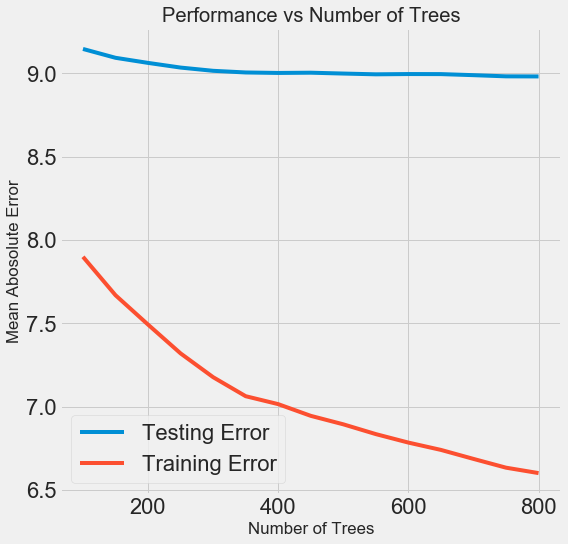

In [127]:
# 获取结果
results = pd.DataFrame(grid_search.cv_results_)

# 绘制不同树的数量的训练和测试误差
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Abosolute Error')
plt.legend();
plt.title('Performance vs Number of Trees')

In [128]:
results.sort_values('mean_test_score', ascending = False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      47.416784      0.998062         0.075453        0.009229   
13      42.438601      1.069725         0.075953        0.005428   
12      42.857592      0.706954         0.066710        0.008312   
9       27.753509      0.350437         0.042475        0.004150   
11      35.953674      0.654295         0.057465        0.004970   

   param_n_estimators                 params  split0_test_score  \
14                800  {'n_estimators': 800}          -8.825290   
13                750  {'n_estimators': 750}          -8.830566   
12                700  {'n_estimators': 700}          -8.836049   
9                 550  {'n_estimators': 550}          -8.853730   
11                650  {'n_estimators': 650}          -8.851136   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
14          -8.758299          -9.296941          -9.047485        -8.981946   
13          -8.751699          -9.298411          -9.049730        -8.982544   
12          -8.755862          -9.312990          -9.053755        -8.989605   
9           -8.756938          -9.325492          -9.042721        -8.994663   
11          -8.755401          -9.325190          -9.052215        -8.995928   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
14        0.210990                1           -6.739448           -6.648109   
13        0.212523                2           -6.772908           -6.660453   
12        0.216159                3           -6.812928           -6.695770   
9         0.216865                4           -7.003413           -6.781878   
11        0.218168                5           -6.864375           -6.721452   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
14           -6.486269           -6.530287         -6.601028         0.099437  
13           -6.520818           -6.579989         -6.633542         0.094501  
12           -6.611240           -6.624919         -6.686214         0.079884  
9            -6.809121           -6.745712         -6.835031         0.099783  
11           -6.708191           -6.666758         -6.740194         0.074480

从上图来看，很明显我们的模型[过拟合](https://elitedatascience.com/overfitting-in-machine-learning)了！训练误差明显低于测试误差，这表明模型正在很好地学习训练数据，但是无法泛化到测试数据。随着树数量的增加，对训练集的拟合效果变好，测试和训练误差都会减少，但训练误差会更快地减少。

训练误差和测试误差之间始终存在显著的差异（训练误差始终较低），我们希望通过获取更多训练数据或降低模型的复杂性来尝试降低过拟合，例如可以进行超参数调整或正则化。对于[GDBT回归](https://www.quora.com/How-do-you-correct-for-overfitting-for-a-Gradient-Boosted-Machine)，可以减少树的数量，减少每棵树的最大深度，以及增加叶节点中的最小样本数。对于任何想要进一步了解GDBT回归的人来说，[这是一篇很棒的文章](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)。目前，我们将使用具有最佳性能的模型，并接受它可能对训练集过拟合的事实。

根据交叉验证结果，使用800棵树的最佳模型的交叉验证误差在9以下。这表明`Energy Star Score`能源之星分数的平均交叉验证估计在真实答案的9分之内，即使模型过拟合了，但仍然是一个不错的结果。

## 6 使用最佳模型评估测试集
我们将使用超参数调整中的最佳模型来对测试集进行预测。 请记住，我们的模型以前从未见过测试集，所以这个性能应该是模型在现实世界中部署时的表现的一个很好的指标。

为了比较，我们还可以查看使用默认参数的模型的性能并和最佳模型进行比较。 下面的代码创建最终模型，训练它（带有时间），并评估测试集。

In [129]:
# 默认模型
default_model = GradientBoostingRegressor(random_state = 42)

# 选择最优模型
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

1.36 s ± 117 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [131]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

18.6 s ± 471 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [132]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0130.
Final model performance on the test set:   MAE = 9.0453.


最终的模型比基线模型的性能提高了大约10％，但代价是显著增加了运行时间。 机器学习通常是一个需要权衡的领域：

- 偏差与方差
- 准确性与可解释性
- 准确性与运行时间
- 以及使用哪种模型

最终决定取决于具体情况。 这里，运行时间的增加不是障碍，因为虽然相对差异很大，但训练时间的绝对量值并不显着。 在不同的情况下，权衡可能不一样，因此我们需要考虑我们正在优化的内容以及我们必须使用的限制。

为直观地了解预测效果，我们可以绘制下面两个值的分布：测试集上的真实值和最终模型的预测值

C:\Users\huangqiancun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Test Values and Predictions')

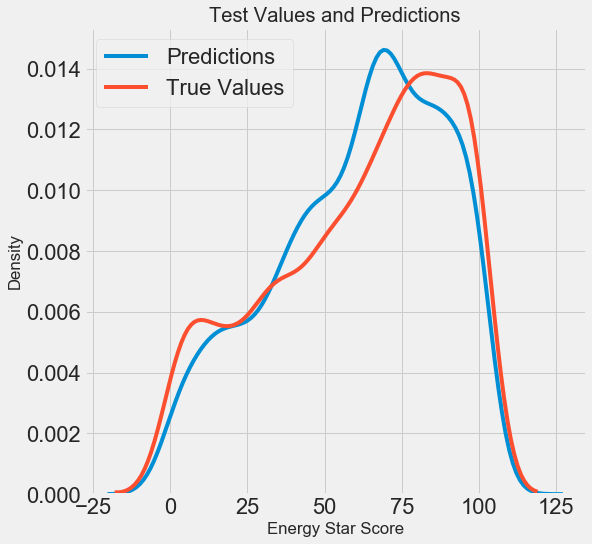

In [133]:
figsize(8, 8)

# 测试集上的真实值和预测值的密度图
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'True Values')

plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Test Values and Predictions')

虽然预测值的密度更接近测试值的中值而不是100的实际峰值，但分布看起来几乎相同。看来模型在预测极值时可能不太准确 而是预测值更接近中位数。

接下来，我们画一下预测值与真实值残差的直方图。 理想情况下，我们希望残差是正态分布的，这意味着模型在两个方向（高和低）上都是预测误差情况是一样的。

Text(0.5, 1.0, 'Distribution of Residuals')

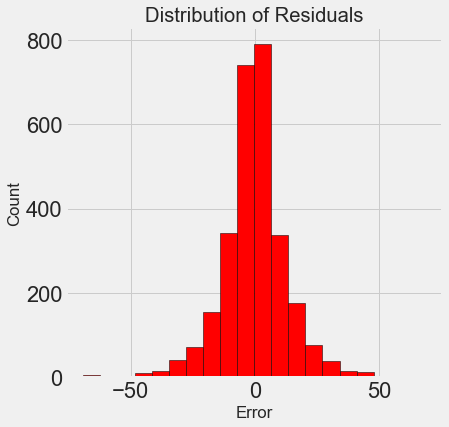

In [134]:
figsize(6, 6)

# 计算残差
residuals = final_pred - y_test

# 残差的直方图
plt.hist(residuals, color = 'red', bins = 20, edgecolor = 'black')

plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

残差接近正态分布，低端有一些明显的异常值。 这些表明模型估计远低于真实值。

### 6.1 小结
以上我们完成了机器学习的4到6三个步骤：
4. 建立baseline并根据性能指标比较多个机器学习模型
5. 对最佳模型执行超参数调整，以针对该问题进行优化
6. 使用最佳模型评估测试集

结果表明机器学习适用于我们的问题，最终模型能够将建筑物的能源之星分数预测到9.1分以内（尽管存在过拟合现象）。我们还看到：
- 超参数调整能够略微改善模型的性能，但同时会消耗大量的时间。这表明，正确的特征工程和收集更多数据（如果可能！）比微调模型有更大的回报。我们还观察了运行时间与精度之间的权衡，这是我们在设计机器学习模型时必须考虑的众多因素之一。

我们知道我们的模型是准确的，但是我们需要知道为什么它能做出正确预测！机器学习过程的下一步至关重要：**尝试理解模型如何进行预测，即尽可能地解释模型结果。**实现高精度是很好的，但如果我们能够找出模型能够准确预测的原因，那么我们也可以使用这些信息来更好地理解问题。例如，模型依靠什么特征来推断能源之星分数？可以使用此模型进行特征选择，并实现更易于解释的更简单模型吗？

在接下来的部分，我们将尝试回答这些问题并从项目中得出最终结论！

## 7 解释模型
本节，我们将查看我们构建的黑盒子模型。我们知道这是准确的，因为它可以预测能源之星分数在真实值的相对误差在9分之内，但它究竟是如何做出预测的呢？ 我们将研究一些尝试理解GBDT回归然后得出结论。

In [140]:
# 引入树模型
from sklearn import tree

# LIME 用于解释预测
import lime 
import lime.lime_tabular

### 7.1 重新构建最终模型

In [141]:
# 使用超参数搜索的结果重构模型
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
# 在测试集上做预测
model_pred = model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = 9.0453


### 7.2 解释模型
机器学习经常被批评为一个[黑盒子](https://www.technologyreview.com/s/604087/the-dark-secret-at-the-heart-of-ai/)：
- 我们把数据丢进去，它给了我们预测答案。 虽然这些答案通常非常准确，但该模型并未告诉我们它是如何实际做出预测的。 

这在某种程度上是正确的，但我们可以通过多种方式尝试并发现模型如何“思考”，例如[局部可理解的与模型无关的解释器(Locally Interpretable Model-agnostic Explainer, LIME)](https://arxiv.org/pdf/1602.04938.pdf)。 这种方法试图通过学习围绕预测的线性回归来解释模型预测，这是一个易于解释的模型！

我们将探索几种解释模型的方法：

- 特征重要性
- 局部可理解的与模型无关的解释器（LIME）
- 检查整体中的单个决策树

### 7.2 特征重要性
我们可以解释决策树集成的基本方法之一是通过特征重要性。 这些可以解释为最能预测目标的特征。 虽然特征重要性的实际细节非常复杂[(这里是相关讨论)](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined)，我们可以使用相对值来比较特征并确定哪些与我们的问题最相关。

在scikit-learn中，从经过训练的树集成中提取特征重要性非常容易。 我们将特征重要性存储在数据帧中以分析和可视化它们。

In [143]:
# 提取特征重要性，保存到数据帧中
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})

# 显示最重要的10个特征
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.443737
1  Weather Normalized Site Electricity Intensity ...    0.249489
2      Water Intensity (All Water Sources) (gal/ft²)    0.054552
3  log_Water Intensity (All Water Sources) (gal/ft²)    0.032452
4                                        Property Id    0.027158
5                               DOF Gross Floor Area    0.025096
6      Largest Property Use Type_Multifamily Housing    0.021317
7                                         Year Built    0.020704
8        log_Direct GHG Emissions (Metric Tons CO2e)    0.019706
9  Largest Property Use Type_Non-Refrigerated War...    0.019264

`Site EUI (kBtu/ft²)`	和`Weather Normalized Site Electricity Intensity (kWh/ft²)`是两个相对最重要的两个特征。之后，相对重要性大幅下降，这表明我们可能不需要保留所有特征来创建具有几乎相同性能的模型。

让我们可视化特征重要性。

Text(0.5, 1.0, 'Feature Importance from Random Forest')

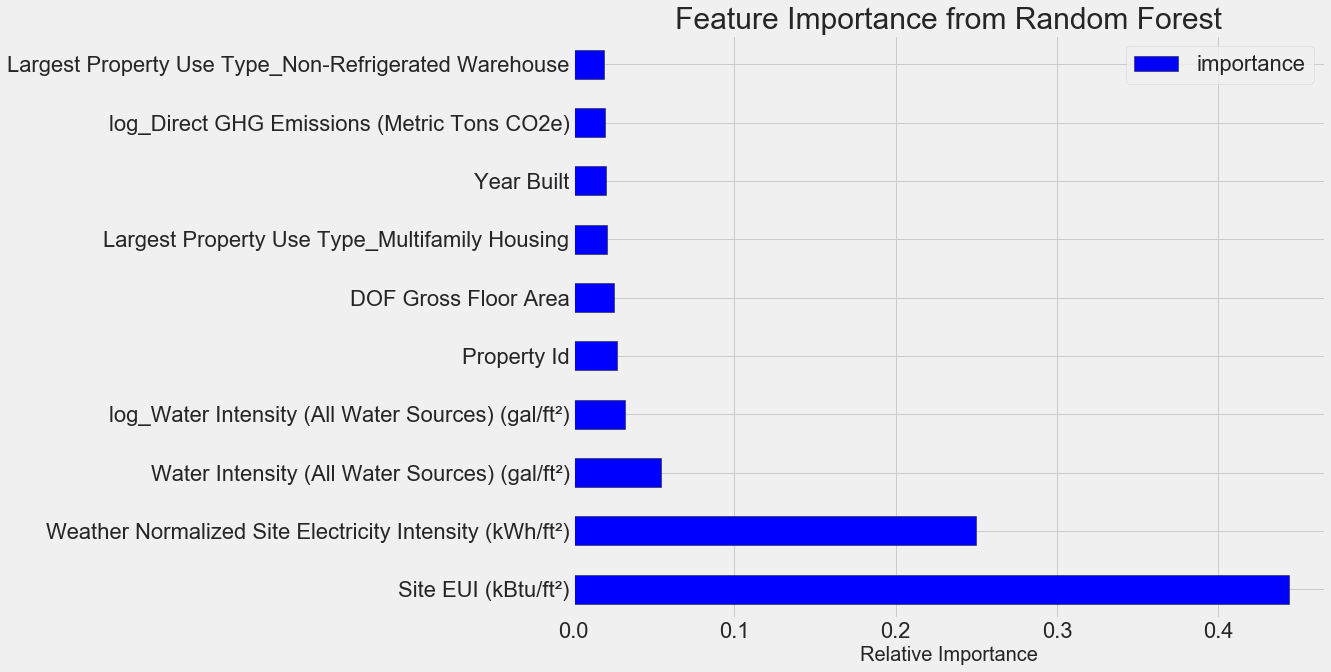

In [144]:
figsize(12, 10)

# 将最重要的10个特征画成直方图
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                               edgecolor = 'k', kind = 'barh', color = 'blue')
plt.xlabel('Relative Importance', size = 20)
plt.ylabel('')
plt.title('Feature Importance from Random Forest', size = 30)

**利用特征重要性进行特征选择:**

鉴于并非每个特征对于影响分数都很重要，如果我们将随机森林中最重要特征的子集用于更简单的模型（如线性回归），会发生什么？ 线性回归确实优于基线，但与模型复杂模型相比表现不佳。 让我们尝试仅在线性回归中的使用10个最重要的特征来查看性能是否得到改善。 我们还可以限制这些功能并重新评估随机森林。

In [150]:
# 提取重要的10个特征名称
most_important_features = feature_results['feature'][:10]

# 寻找对应特征的index
indices = [list(train_features.columns).index(x) for x in most_important_features]

# 仅保留最重要的10个特征
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [151]:
lr = LinearRegression()

# 拟合所有特征
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# 仅拟合最重要的10个特征
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# 结果对比
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.4651.
Linear Regression Reduced Results: MAE = 14.4016.


可以看到，减少特征并没有改善线性回归结果！ 事实证明，低重要性特征中的额外信息确实可以提高性能。

让我们再看看在梯度提升回归中使用减少的特征集。 性能如何受到影响？

In [152]:
# 使用一样的超参数建立梯度提升模型
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# 拟合并预测
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 9.5251


随着特征的减少，模型结果略差，我们将为最终模型保留所有特征。 减少特征数量是因为我们总是希望构建[最简约的模型](http://www.statisticshowto.com/parsimonious-model/)：
- 即具有足够性能的最简单模型。 使用较少特征的模型将更快地训练并且通常更容易解释。

在这种情况下，保留所有特征并不是主要问题，因为训练时间在本项目中并不重要，我们仍然可以使用许多特征进行解释。

### 7.3 局部可理解的与模型无关的解释器（LIME）

我们将使用[LIME](https://github.com/marcotcr/lime)来解释模型所做的个别预测。 LIME是一项相对较新的工作，旨在通过用线性模型近似一个预测周围的区域来展示机器学习模型的思考方式。

我们将试图解释模型在两个例子上得到的预测结果：**其中一个例子得到的预测结果非常差，另一个例子得到的预测结果非常好。** 我们将限制使用的10个最重要的特征来帮助解释。 虽然在10个最重要的特征上训练的模型稍微不准确，但我们通常必须权衡可解释性的准确性！

In [153]:
# 计算残差
residuals = abs(model_reduced_pred - y_test)

# 提取最差和最好的预测
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [154]:
# 创建lime解释器
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

Prediction: 14.1601
Actual Value: 96.0000


C:\Users\huangqiancun\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.113013e-27
  overwrite_a=True).T


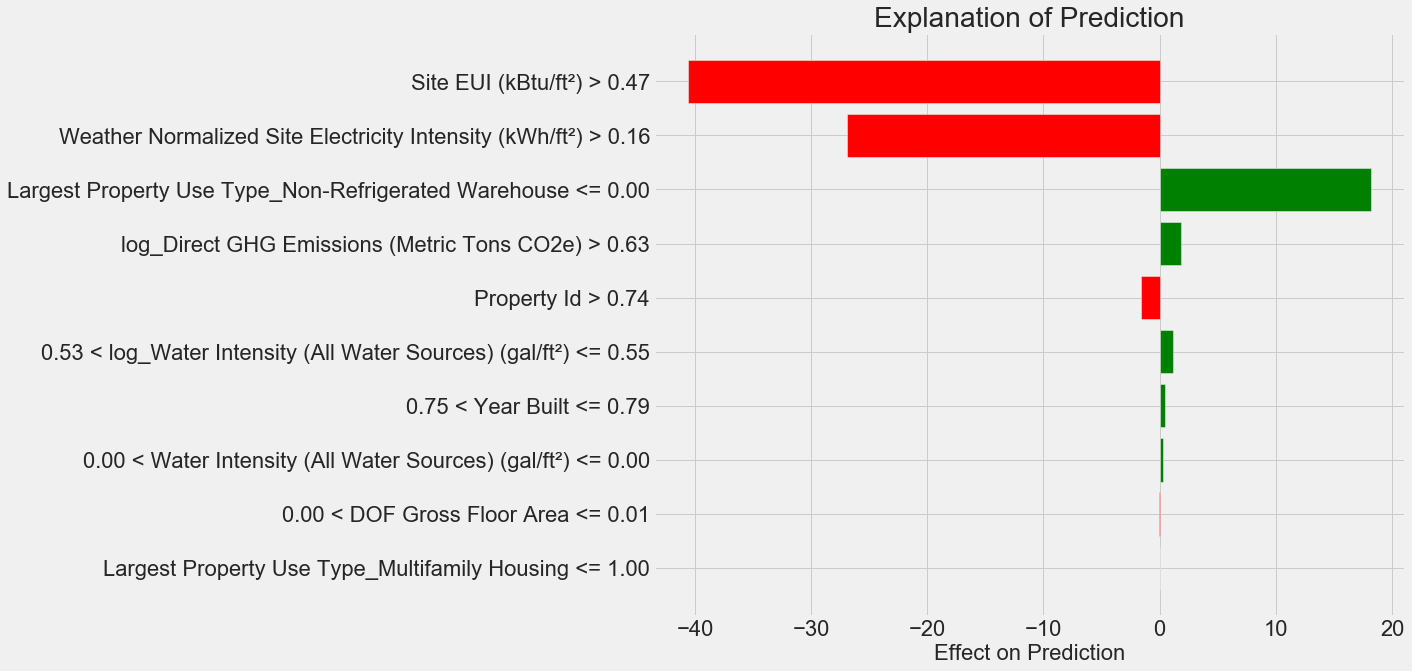

In [157]:
# 为错误示例显示预测值和真实值
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# 解释错误预测
wrong_exp = explainer.explain_instance(data_row = wrong, predict_fn = model_reduced.predict)

# 绘制预测解释
wrong_exp.as_pyplot_figure()
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [161]:
wrong_exp.show_in_notebook(show_predicted_value=False)

在这个例子中，我们的梯度提升模型预测分数为14.1601，实际值为96.0。

LIME的图表向我们展示了该示例的每个特征对最终预测的贡献。我们可以看到，Site EUI 显着降低了预测，因为它高于0.47。另一方面，Largest Property Use Type_Non-Refrigerated Warehouse 增加了预测，因为它低于0。

我们可以将此解释为我们的模型认为能源之星分数会比实际低得多，因为网站EUI很高。然而，在这种情况下，尽管Site EUI很大，但分数仍为96。虽然这个重大错误（偏离了82分！）可能最初令人困惑，但现在我们可以看到，实际上，该模型正在推理问题并且刚刚达到了错误值！一个人在同一个过程中可能会得出同样的结论（如果他们有耐心去查看所有数据）。

现在我们可以通过模型得到最好预测的解释。

Prediction: 100.0000
Actual Value: 100.0000


C:\Users\huangqiancun\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.087887e-27
  overwrite_a=True).T


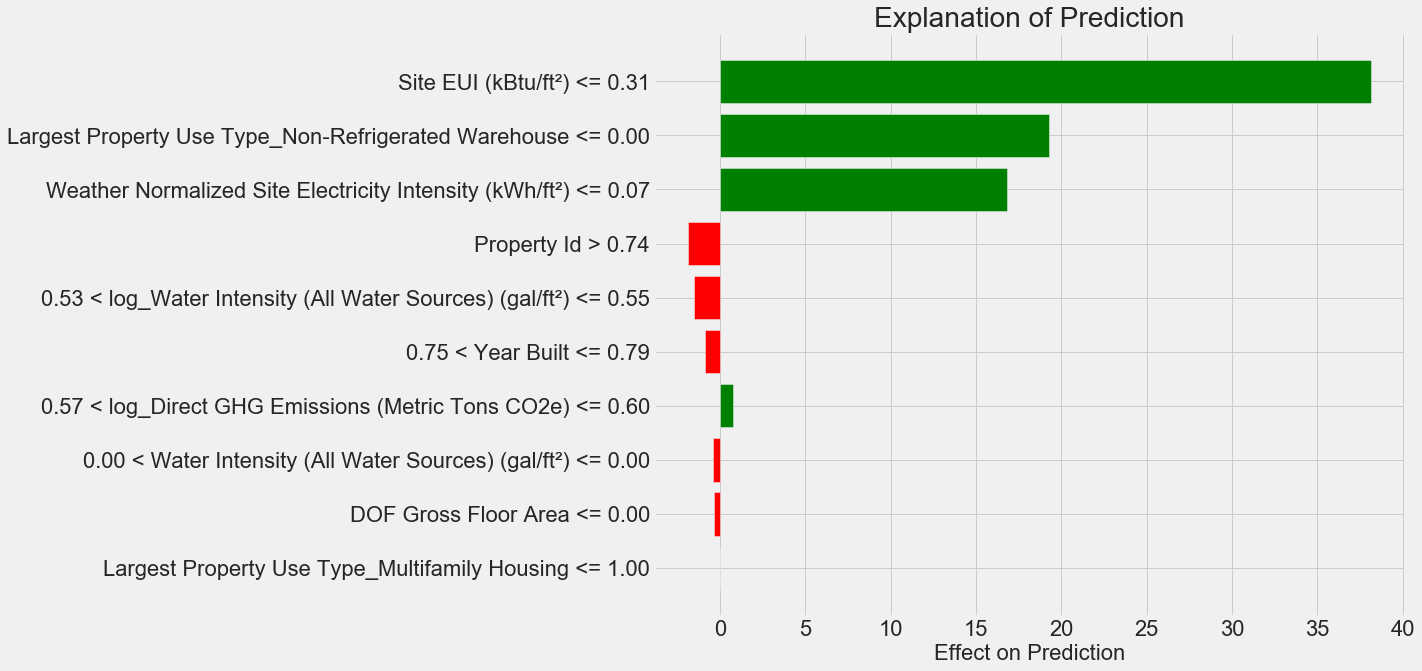

In [166]:
# 为正确示例显示预测值和真实值
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# 解释正确预测
right_exp = explainer.explain_instance(data_row = right, predict_fn = model_reduced.predict)
# 绘制预测解释
right_exp.as_pyplot_figure()
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [167]:
right_exp.show_in_notebook(show_predicted_value=False)

可以看到，正确值和预测值都是100！

来自LIME的图再次显示了对该实例的每个特征变量的预测的贡献。例如，因为Site EUI 低于0.31（实际为0），这对分数的更高估计有显着贡献。同样，Largest Property Use Type_Non-Refrigerated Warehouse 小于等于0也对最终预测做出了积极贡献。

观察这些细分图可以让我们了解模型如何进行预测。这对于有大量特征影响模型的情况可能是最有价值的，因为我们可以检查错误并且可能设计更好的特征或调整模型的超参数以改进下次的预测。

模型偏离最多的示例也可能是手动查看的有趣边缘情况。由于Site EUI升高，该模型大大低估了第一座建筑的能源之星分数。因此，我们可能想问一下，为什么建筑物在EUI如此高的情况下还具有如此高的能源之星分数。有了这个过程，我们尝试使用机器学习算法来理解问题似乎比简单地让模型做出预测并完全信任它们要好得多！虽然LIME并不完美，但它代表了向解释机器学习模型的正确方向迈出的一步。

### 7.4 检查整体中的单个决策树
基于树的集合最酷的部分之一是我们可以查看任何单个估计器（estimator）。虽然我们的最终模型由800个决策树组成，并且查看单个决策树并不表示整个模型，但它仍然允许我们看到决策树是如何工作的。 想象出数百棵决策树，我们可以[根据以前树木的错误进行最终预测](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)（这是对[梯度提升回归如何工作](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)的显著简化）。

我们将首先从森林中提取一棵树，然后使用`sklearn.tree.export_graphviz`保存它。 这将树保存为`.dot`文件，可以使用Notebook中的命令行指令将其转换为`png`。

In [169]:
# 提取出一棵决策树
single_tree = model_reduced.estimators_[105][0]

# 保存为 .dot文件
tree.export_graphviz(single_tree, out_file = 'images/tree.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True)

single_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=6,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x00000226012DDC60>,
           splitter='best')

然后，你可以使用graphviz包中的dot命令行工具将此.dot文件转换为各种格式，如PDF或PNG。下面这条cmd命令行指令将.dot文件转换为.png图像文件(需要先安装graphviz包)：

`dot -Tpng images/tree.dot -o images/tree.png`

下面的代码是把生成的tree.png 显示出来，

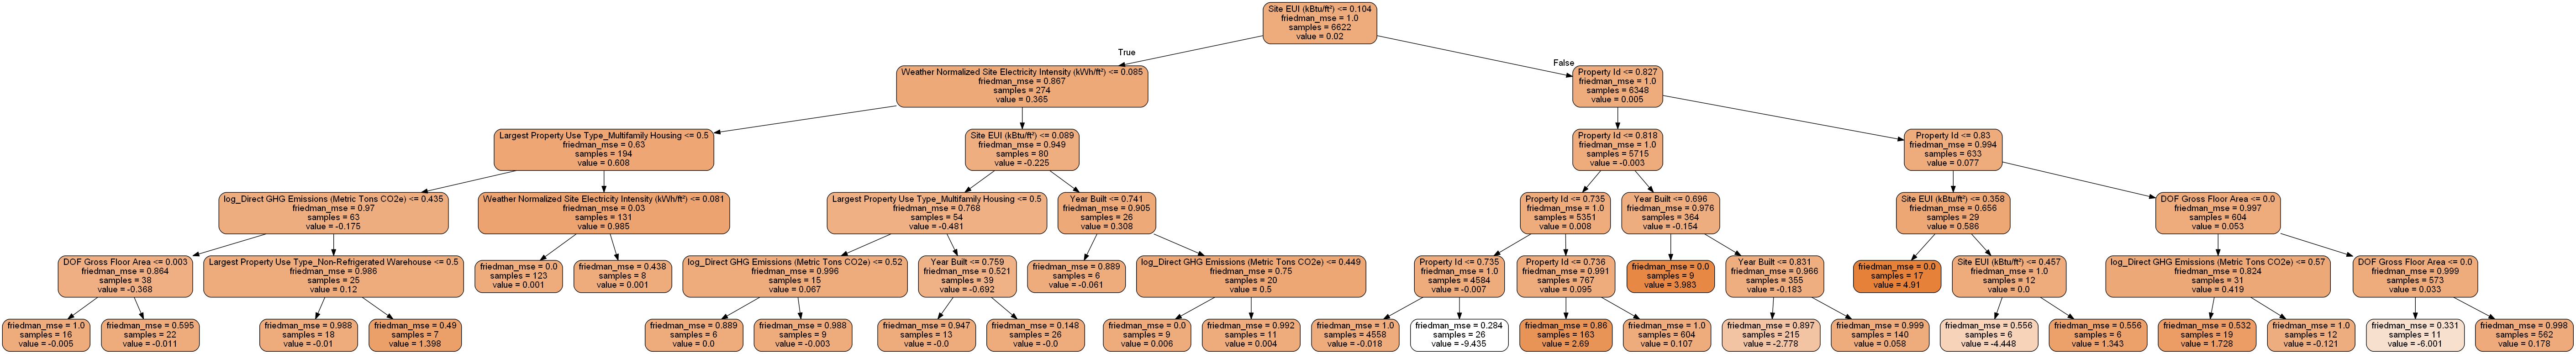

In [175]:
from IPython.display import Image
Image(filename="images/tree.png")

这是我们包含800棵决策树的整棵树！ 这有点难以辨认，因为树的最大深度为5。为了提高可读性，我们可以限制调用中的最大深度来导出树。

In [173]:
tree.export_graphviz(single_tree, out_file = 'images/tree_small.dot',
                     rounded = True, feature_names = most_important_features,
                     filled = True, max_depth = 3)

在命令行执行以下命令将.dot文件转换为.png图像文件：

`dot -Tpng images/tree_small.dot -o images/tree_small.png`

然后使用相同的代码把生成的tree_small.png 显示出来

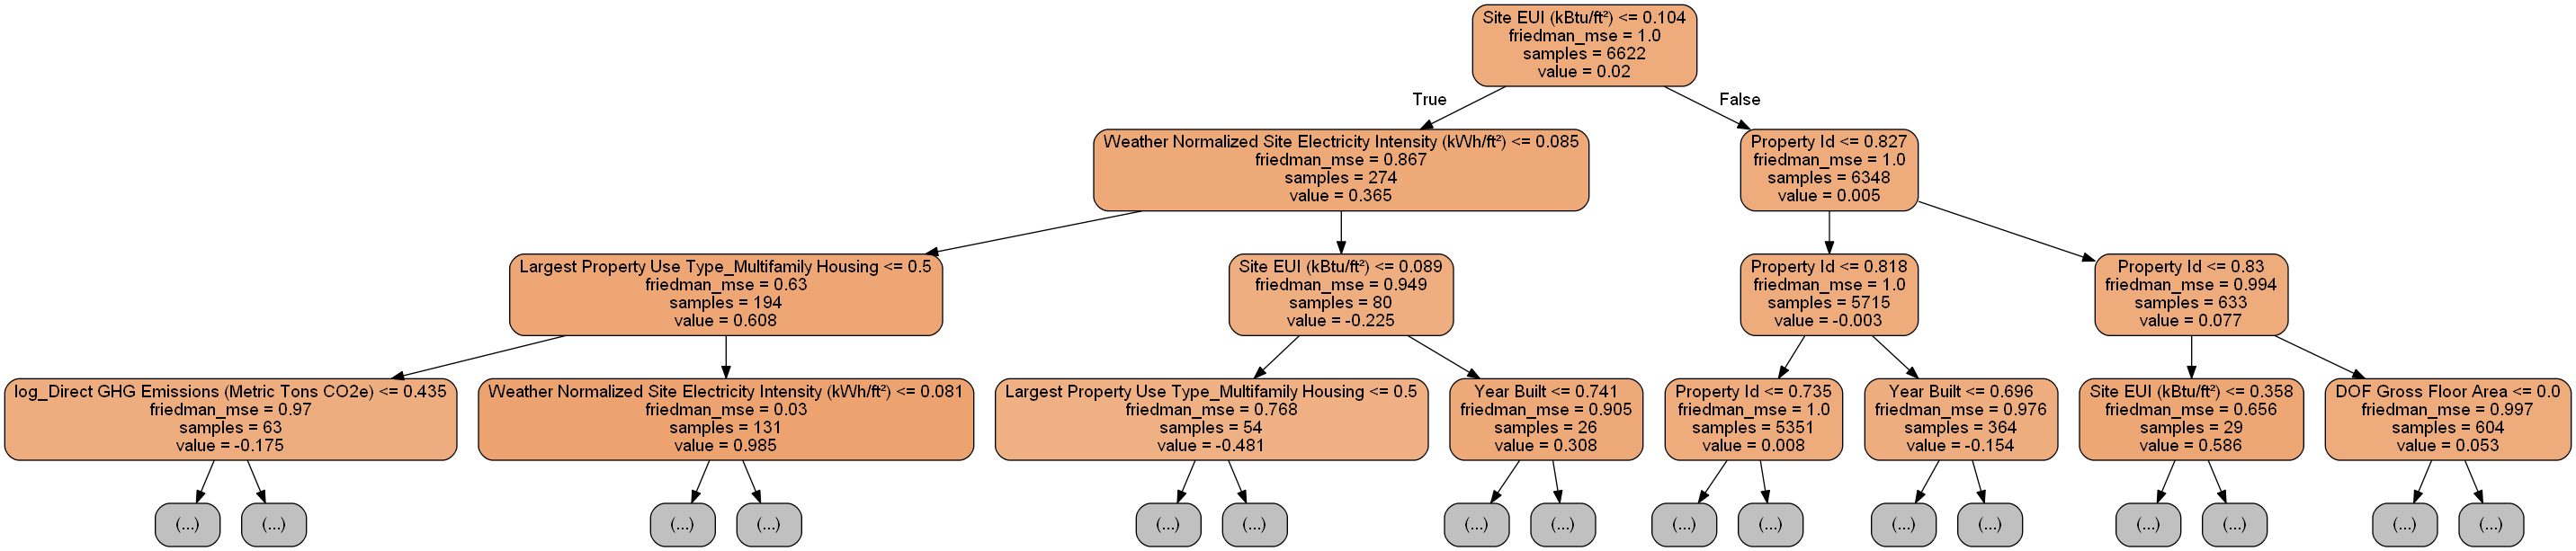

In [177]:
# 限制最大深度后的决策树长这样
from IPython.display import Image
Image(filename="images/tree_small.png")

现在我们可以看一下树，并尝试用它来代表它的决定！思考决策树的最佳方式是作为一系列是/否问题，如流程图。我们从顶部开始，称为根，然后沿着树向下移动，行进方向由每个等式的答案确定。

例如，我们在这里提出的第一个问题是：Site EUI是否小于或等于0.104？如果答案是肯定的，那么我们向左移动并提出问题：Weather Normalized Site Electricity Intensity是否小于或等于0.085？

我们继续这个迭代过程，直到我们到达树的底部并最终进入叶节点。这里，我们预测的值对应于节点中显示的值（此树中的值似乎是实际预测除以100）。

每个节点有四个不同的信息：

- The question：基于这个答案，我们向右或向左移动到树中的下一个节点
- friedman_mse：给定节点中所有示例的错误误差
- sample：节点中的样本数
- 值：节点中所有样本的目标预测值

我们可以看到：
- 随着我们增加树的深度，我们将能够更好地拟合数据。对于小树，每个叶节点中将有许多示例，并且因为模型为节点中的每个示例估计相同的值，所以可能存在更大的错误（除非所有示例具有相同的目标值）。
- 构造太大的树虽然可能导致过度拟合。
- 我们可以控制许多超参数，这些参数决定了树的深度和每个叶子中的例子数量。当我们使用交叉验证执行优化时，我们在前文看到了如何在选择其中一些超参数。

虽然我们显然无法检查模型中的每一棵树，但查看单个树确实可以让我们了解我们的模型如何进行预测。事实上，这种基于流程图的方法看起来很像人类做出决策，一次回答一个关于单个值的问题。基于决策树的集合简单地采用单个决策树的概念并组合许多个体的预测，以便创建具有比单个估计器更小的方差的模型。树木的集合往往非常准确，也很直观！

## 8 得出结论并撰写详尽记录的报告

### 8.1 得出结论
机器学习流程的最后部分可能是最重要的：我们需要将我们学到的所有内容压缩成一个简短的摘要，仅突出最重要的发现。

1. 使用纽约市的能源数据，可以建立一个模型，可以预测建筑物的`Energy Star Score`能源之星分数，误差在10分以内。
2. `The Site EUI` 和 `Weather Normalized Electricity Intensity` 是预测能源之星分数的最相关特征。
3.  给定一个新建筑的数据，经过训练的模型可以准确地推断出该建筑的能源之星的分数。



### 8.2 记录文档
Jupyter Notebooks的最佳方面之一是它们可以直接下载为pdf或html，然后与他人共享。如果有人要求提供详细信息，那么我们可以轻松地解释所有实施步骤，并展示我们（希望）有充分记录的工作。 机器学习项目的另一个重要方面是：
- 你已经注解了所有代码并使其易于跟进！ 
- 你希望别人（或者你自己在几个月内）能够看到你的工作并完全理解你做出的决定。 
- 理想情况下，你应该编写代码，以便再次使用它。 即使我们自己做项目，也可以练习正确的文档，当你想重新审视项目时，它会让你的生活更轻松。

一些有用的学习资源：
1. [Hands-On Machine Learning with Scikit-Learn and Tensorflow](https://github.com/ageron/handson-ml)
2. [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
3. [Kaggle: The Home of Data Science and Machine Learning](https://www.kaggle.com/)
4. [Datacamp: Good Beginner Tutorials for Practicing Coding with a Focus on Data Science](https://www.datacamp.com/)
5. [Dataquest: Hands on Lessons for Data Science Programming](https://www.dataquest.io/)